# Load community pipelines and components
- Ref: https://huggingface.co/docs/diffusers/v0.34.0/en/using-diffusers/custom_pipeline_overview

In [3]:
#@title
import torch
cpu_use = False
if torch.backends.mps.is_available():
    t_device = torch.device("mps")
    s_device = "mps"
    print(f"Current memory allocated on MPS: {torch.mps.current_allocated_memory()} bytes")
    print(f"Driver memory allocated on MPS: {torch.mps.driver_allocated_memory()} bytes")
elif torch.cuda.is_available():
    t_device = torch.device("cuda")
    s_device = "cuda"
else:
    t_device = torch.device("cpu")
    s_device = "cpu"
    cpu_use = True
print(t_device)

Current memory allocated on MPS: 0 bytes
Driver memory allocated on MPS: 393216 bytes
mps


## 1. Community pipelines


### 1.3 Load with from_pipe


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /Users/hyunjae.k/.cache/huggingface/hub/models--emilianJR--CyberRealistic_V3/snapshots/15a03a2d65a99c6bb178135533c3d7ed27076bb1/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/hyunjae.k/.cache/huggingface/hub/models--emilianJR--CyberRealistic_V3/snapshots/15a03a2d65a99c6bb178135533c3d7ed27076bb1/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /Users/hyunjae.k/.cache/huggingface/hub/models--emilianJR--CyberRealistic_V3/snapshots/15a03a2d65a99c6bb178135533c3d7ed27076bb1/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/hyunjae.k/.cache/huggingface/hub/models--emilianJR--CyberRealistic_V3/snapshots/15a03a2d65a99c6bb178135533c3d7ed27076bb1/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Token indices sequence length is longer than the specified

  0%|          | 0/50 [00:00<?, ?it/s]

the original image size (512, 512)


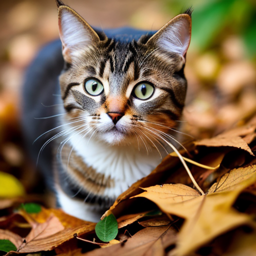

In [4]:
import torch
from diffusers import DiffusionPipeline

pipe_sd = DiffusionPipeline.from_pretrained("emilianJR/CyberRealistic_V3", torch_dtype=torch.float16)
pipe_sd.to(t_device)

prompt = "cat, hiding in the leaves, ((rain)), zazie rainyday, beautiful eyes, macro shot, colorful details, natural lighting, amazing composition, subsurface scattering, amazing textures, filmic, soft light, ultra-detailed eyes, intricate details, detailed texture, light source contrast, dramatic shadows, cinematic light, depth of field, film grain, noise, dark background, hyperrealistic dslr film still, dim volumetric cinematic lighting"
neg_prompt = "(deformed iris, deformed pupils, semi-realistic, cgi, 3d, render, sketch, cartoon, drawing, anime, mutated hands and fingers:1.4), (deformed, distorted, disfigured:1.3), poorly drawn, bad anatomy, wrong anatomy, extra limb, missing limb, floating limbs, disconnected limbs, mutation, mutated, ugly, disgusting, amputation"
generator = torch.Generator(device="cpu").manual_seed(20)
out_sd = pipe_sd(
    prompt,
    negative_prompt=neg_prompt,
    width=512,
    height=512,
    max_embeddings_multiples=3,
    num_inference_steps=50,
    generator=generator,
    )

image = out_sd.images[0]
print(f"the original image size {image.size}")
image.resize((256, 256))

lpw_stable_diffusion.py: 0.00B [00:00, ?B/s]

  0%|          | 0/50 [00:00<?, ?it/s]

the original image size (512, 512)


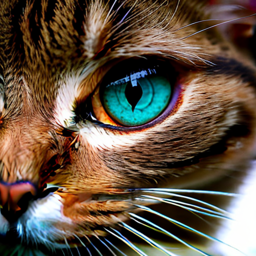

In [5]:
# load long prompt weighting pipeline
pipe_lpw = DiffusionPipeline.from_pipe(
    pipe_sd,
    custom_pipeline="lpw_stable_diffusion",
).to(t_device)

prompt = "cat, hiding in the leaves, ((rain)), zazie rainyday, beautiful eyes, macro shot, colorful details, natural lighting, amazing composition, subsurface scattering, amazing textures, filmic, soft light, ultra-detailed eyes, intricate details, detailed texture, light source contrast, dramatic shadows, cinematic light, depth of field, film grain, noise, dark background, hyperrealistic dslr film still, dim volumetric cinematic lighting"
neg_prompt = "(deformed iris, deformed pupils, semi-realistic, cgi, 3d, render, sketch, cartoon, drawing, anime, mutated hands and fingers:1.4), (deformed, distorted, disfigured:1.3), poorly drawn, bad anatomy, wrong anatomy, extra limb, missing limb, floating limbs, disconnected limbs, mutation, mutated, ugly, disgusting, amputation"
generator = torch.Generator(device="cpu").manual_seed(20)
out_lpw = pipe_lpw(
    prompt,
    negative_prompt=neg_prompt,
    width=512,
    height=512,
    max_embeddings_multiples=3,
    num_inference_steps=50,
    generator=generator,
    )
image = out_lpw.images[0]
print(f"the original image size {image.size}")
image.resize((256, 256))


## 2. Example community pipelines

### 2.1. Marigold

In [ ]:
import torch
from PIL import Image
from diffusers import DiffusionPipeline
from diffusers.utils import load_image

pipeline = DiffusionPipeline.from_pretrained(
    "prs-eth/marigold-lcm-v1-0",
    custom_pipeline="marigold_depth_estimation",
    torch_dtype=torch.float16,
    variant="fp16",
)

pipeline.to(t_device)
image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/community-marigold.png")
output = pipeline(
    image,
    denoising_steps=4,
    ensemble_size=5,
    processing_res=768,
    match_input_res=True,
    batch_size=0,
    seed=33,
    color_map="Spectral",
    show_progress_bar=True,
)
depth_colored: Image.Image = output.depth_colored
# depth_colored.save("./temp_depth_colored.png")



Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  Inference batches:   0%|          | 0/5 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

/Users/hyunjae.k/anaconda3/envs/2025_drills/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:619: RuntimeWarning: invalid value encountered in divide
  J_transposed[i] = df / dx


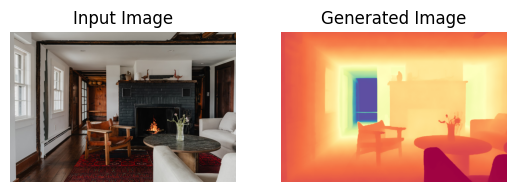

In [36]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 2)

axis[0].imshow(image)
axis[0].set_axis_off()
axis[0].set_title("Input Image")

axis[1].imshow(depth_colored)
axis[1].set_axis_off()
axis[1].set_title("Generated Image")

plt.show()


### 2.2 HD-Painter

In [ ]:
# import torch
# from diffusers import DiffusionPipeline, DDIMScheduler
# from diffusers.utils import load_image

# pipeline = DiffusionPipeline.from_pretrained(
#     "stable-diffusion-v1-5/stable-diffusion-v1-5-inpainting",
#     custom_pipeline="hd_painter"
# )
# pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)
# init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/hd-painter.jpg")
# mask_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/hd-painter-mask.png")
# prompt = "football"
# image = pipeline(prompt, init_image, mask_image, use_rasg=True, use_painta=True, generator=torch.manual_seed(0)).images[0]
# image

# Does not work:
# Repository Not Found for url: https://huggingface.co/api/models/stable-diffusion-v1-5/stable-diffusion-v1-5-inpainting.
# Please make sure you specified the correct `repo_id` and `repo_type`.
# If you are trying to access a private or gated repo, make sure you are authenticated. For more details, see https://huggingface.co/docs/huggingface_hub/authentication
# Invalid username or password..
# Will try to load from local cache.

## 3. Community components

In [7]:
from transformers import T5Tokenizer, T5EncoderModel

pipe_id = "showlab/show-1-base"
tokenizer = T5Tokenizer.from_pretrained(pipe_id, subfolder="tokenizer")
text_encoder = T5EncoderModel.from_pretrained(pipe_id, subfolder="text_encoder")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [8]:
from diffusers import DPMSolverMultistepScheduler

scheduler = DPMSolverMultistepScheduler.from_pretrained(pipe_id, subfolder="scheduler")

In [9]:
from transformers import CLIPImageProcessor

feature_extractor = CLIPImageProcessor.from_pretrained(pipe_id, subfolder="feature_extractor")

In [ ]:
%%writefile temp_showone_unet_3d_condition.py


# Copyright 2023 Alibaba DAMO-VILAB and The HuggingFace Team. All rights reserved.
# Copyright 2023 The ModelScope Team.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
from dataclasses import dataclass
from typing import Any, Dict, List, Optional, Tuple, Union

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.checkpoint

from diffusers.configuration_utils import ConfigMixin, register_to_config
from diffusers.loaders import UNet2DConditionLoadersMixin
from diffusers.utils import BaseOutput, logging, is_torch_version
from diffusers.models.activations import get_activation
from diffusers.models.attention_processor import AttentionProcessor, AttnProcessor
from diffusers.models.embeddings import (
    GaussianFourierProjection,
    ImageHintTimeEmbedding,
    ImageProjection,
    ImageTimeEmbedding,
    TextImageProjection,
    TextImageTimeEmbedding,
    TextTimeEmbedding,
    TimestepEmbedding,
    Timesteps,
)
from diffusers.models.modeling_utils import ModelMixin

from diffusers.models.transformers.transformer_temporal import TransformerTemporalModel
from diffusers.models.resnet import (
    Downsample2D,
    ResnetBlock2D,
    TemporalConvLayer,
    Upsample2D,
)
from diffusers.models.attention_processor import (
    Attention,
    AttnAddedKVProcessor,
    AttnAddedKVProcessor2_0,
)
from diffusers.models.transformers.transformer_2d import Transformer2DModel
from diffusers.models.attention import BasicTransformerBlock

logger = logging.get_logger(__name__)  # pylint: disable=invalid-name


@dataclass
class UNet3DConditionOutput(BaseOutput):
    """
    Args:
        sample (`torch.FloatTensor` of shape `(batch_size, num_frames, num_channels, height, width)`):
            Hidden states conditioned on `encoder_hidden_states` input. Output of last layer of model.
    """

    sample: torch.FloatTensor


class ShowOneUNet3DConditionModel(ModelMixin, ConfigMixin, UNet2DConditionLoadersMixin):
    r"""
    UNet3DConditionModel is a conditional 2D UNet model that takes in a noisy sample, conditional state, and a timestep
    and returns sample shaped output.

    This model inherits from [`ModelMixin`]. Check the superclass documentation for the generic methods the library
    implements for all the models (such as downloading or saving, etc.)

    Parameters:
        sample_size (`int` or `Tuple[int, int]`, *optional*, defaults to `None`):
            Height and width of input/output sample.
        in_channels (`int`, *optional*, defaults to 4): The number of channels in the input sample.
        out_channels (`int`, *optional*, defaults to 4): The number of channels in the output.
        down_block_types (`Tuple[str]`, *optional*, defaults to `("CrossAttnDownBlock2D", "CrossAttnDownBlock2D", "CrossAttnDownBlock2D", "DownBlock2D")`):
            The tuple of downsample blocks to use.
        up_block_types (`Tuple[str]`, *optional*, defaults to `("UpBlock2D", "CrossAttnUpBlock2D", "CrossAttnUpBlock2D", "CrossAttnUpBlock2D",)`):
            The tuple of upsample blocks to use.
        block_out_channels (`Tuple[int]`, *optional*, defaults to `(320, 640, 1280, 1280)`):
            The tuple of output channels for each block.
        layers_per_block (`int`, *optional*, defaults to 2): The number of layers per block.
        downsample_padding (`int`, *optional*, defaults to 1): The padding to use for the downsampling convolution.
        mid_block_scale_factor (`float`, *optional*, defaults to 1.0): The scale factor to use for the mid block.
        act_fn (`str`, *optional*, defaults to `"silu"`): The activation function to use.
        norm_num_groups (`int`, *optional*, defaults to 32): The number of groups to use for the normalization.
            If `None`, it will skip the normalization and activation layers in post-processing
        norm_eps (`float`, *optional*, defaults to 1e-5): The epsilon to use for the normalization.
        cross_attention_dim (`int`, *optional*, defaults to 1280): The dimension of the cross attention features.
        attention_head_dim (`int`, *optional*, defaults to 8): The dimension of the attention heads.
    """

    _supports_gradient_checkpointing = True

    @register_to_config
    def __init__(
        self,
        sample_size: Optional[int] = None,
        in_channels: int = 4,
        out_channels: int = 4,
        center_input_sample: bool = False,
        flip_sin_to_cos: bool = True,
        freq_shift: int = 0,
        down_block_types: Tuple[str] = (
            "CrossAttnDownBlock3D",
            "CrossAttnDownBlock3D",
            "CrossAttnDownBlock3D",
            "DownBlock3D",
        ),
        mid_block_type: Optional[str] = "UNetMidBlock3DCrossAttn",
        up_block_types: Tuple[str] = (
            "UpBlock3D",
            "CrossAttnUpBlock3D",
            "CrossAttnUpBlock3D",
            "CrossAttnUpBlock3D",
        ),
        only_cross_attention: Union[bool, Tuple[bool]] = False,
        block_out_channels: Tuple[int] = (320, 640, 1280, 1280),
        layers_per_block: Union[int, Tuple[int]] = 2,
        downsample_padding: int = 1,
        mid_block_scale_factor: float = 1,
        act_fn: str = "silu",
        norm_num_groups: Optional[int] = 32,
        norm_eps: float = 1e-5,
        cross_attention_dim: Union[int, Tuple[int]] = 1280,
        transformer_layers_per_block: Union[int, Tuple[int]] = 1,
        encoder_hid_dim: Optional[int] = None,
        encoder_hid_dim_type: Optional[str] = None,
        attention_head_dim: Union[int, Tuple[int]] = 8,
        num_attention_heads: Optional[Union[int, Tuple[int]]] = None,
        dual_cross_attention: bool = False,
        use_linear_projection: bool = False,
        class_embed_type: Optional[str] = None,
        addition_embed_type: Optional[str] = None,
        addition_time_embed_dim: Optional[int] = None,
        num_class_embeds: Optional[int] = None,
        upcast_attention: bool = False,
        resnet_time_scale_shift: str = "default",
        resnet_skip_time_act: bool = False,
        resnet_out_scale_factor: int = 1.0,
        time_embedding_type: str = "positional",
        time_embedding_dim: Optional[int] = None,
        time_embedding_act_fn: Optional[str] = None,
        timestep_post_act: Optional[str] = None,
        time_cond_proj_dim: Optional[int] = None,
        conv_in_kernel: int = 3,
        conv_out_kernel: int = 3,
        projection_class_embeddings_input_dim: Optional[int] = None,
        class_embeddings_concat: bool = False,
        mid_block_only_cross_attention: Optional[bool] = None,
        cross_attention_norm: Optional[str] = None,
        addition_embed_type_num_heads=64,
        transfromer_in_opt: bool = False,
    ):
        super().__init__()

        self.sample_size = sample_size
        self.transformer_in_opt = transfromer_in_opt

        if num_attention_heads is not None:
            raise ValueError(
                "At the moment it is not possible to define the number of attention heads via `num_attention_heads` because of a naming issue as described in https://github.com/huggingface/diffusers/issues/2011#issuecomment-1547958131. Passing `num_attention_heads` will only be supported in diffusers v0.19."
            )

        # If `num_attention_heads` is not defined (which is the case for most models)
        # it will default to `attention_head_dim`. This looks weird upon first reading it and it is.
        # The reason for this behavior is to correct for incorrectly named variables that were introduced
        # when this library was created. The incorrect naming was only discovered much later in https://github.com/huggingface/diffusers/issues/2011#issuecomment-1547958131
        # Changing `attention_head_dim` to `num_attention_heads` for 40,000+ configurations is too backwards breaking
        # which is why we correct for the naming here.
        num_attention_heads = num_attention_heads or attention_head_dim

        # Check inputs
        if len(down_block_types) != len(up_block_types):
            raise ValueError(
                f"Must provide the same number of `down_block_types` as `up_block_types`. `down_block_types`: {down_block_types}. `up_block_types`: {up_block_types}."
            )

        if len(block_out_channels) != len(down_block_types):
            raise ValueError(
                f"Must provide the same number of `block_out_channels` as `down_block_types`. `block_out_channels`: {block_out_channels}. `down_block_types`: {down_block_types}."
            )

        if not isinstance(only_cross_attention, bool) and len(
            only_cross_attention
        ) != len(down_block_types):
            raise ValueError(
                f"Must provide the same number of `only_cross_attention` as `down_block_types`. `only_cross_attention`: {only_cross_attention}. `down_block_types`: {down_block_types}."
            )

        if not isinstance(num_attention_heads, int) and len(num_attention_heads) != len(
            down_block_types
        ):
            raise ValueError(
                f"Must provide the same number of `num_attention_heads` as `down_block_types`. `num_attention_heads`: {num_attention_heads}. `down_block_types`: {down_block_types}."
            )

        if not isinstance(attention_head_dim, int) and len(attention_head_dim) != len(
            down_block_types
        ):
            raise ValueError(
                f"Must provide the same number of `attention_head_dim` as `down_block_types`. `attention_head_dim`: {attention_head_dim}. `down_block_types`: {down_block_types}."
            )

        if isinstance(cross_attention_dim, list) and len(cross_attention_dim) != len(
            down_block_types
        ):
            raise ValueError(
                f"Must provide the same number of `cross_attention_dim` as `down_block_types`. `cross_attention_dim`: {cross_attention_dim}. `down_block_types`: {down_block_types}."
            )

        if not isinstance(layers_per_block, int) and len(layers_per_block) != len(
            down_block_types
        ):
            raise ValueError(
                f"Must provide the same number of `layers_per_block` as `down_block_types`. `layers_per_block`: {layers_per_block}. `down_block_types`: {down_block_types}."
            )

        # input
        conv_in_padding = (conv_in_kernel - 1) // 2
        self.conv_in = nn.Conv2d(
            in_channels,
            block_out_channels[0],
            kernel_size=conv_in_kernel,
            padding=conv_in_padding,
        )

        if self.transformer_in_opt:
            self.transformer_in = ShowOneTransformerTemporalModel(
                num_attention_heads=8,
                attention_head_dim=64,
                in_channels=block_out_channels[0],
                num_layers=1,
            )

        # time
        if time_embedding_type == "fourier":
            time_embed_dim = time_embedding_dim or block_out_channels[0] * 2
            if time_embed_dim % 2 != 0:
                raise ValueError(
                    f"`time_embed_dim` should be divisible by 2, but is {time_embed_dim}."
                )
            self.time_proj = GaussianFourierProjection(
                time_embed_dim // 2,
                set_W_to_weight=False,
                log=False,
                flip_sin_to_cos=flip_sin_to_cos,
            )
            timestep_input_dim = time_embed_dim
        elif time_embedding_type == "positional":
            time_embed_dim = time_embedding_dim or block_out_channels[0] * 4

            self.time_proj = Timesteps(
                block_out_channels[0], flip_sin_to_cos, freq_shift
            )
            timestep_input_dim = block_out_channels[0]
        else:
            raise ValueError(
                f"{time_embedding_type} does not exist. Please make sure to use one of `fourier` or `positional`."
            )

        self.time_embedding = TimestepEmbedding(
            timestep_input_dim,
            time_embed_dim,
            act_fn=act_fn,
            post_act_fn=timestep_post_act,
            cond_proj_dim=time_cond_proj_dim,
        )

        if encoder_hid_dim_type is None and encoder_hid_dim is not None:
            encoder_hid_dim_type = "text_proj"
            self.register_to_config(encoder_hid_dim_type=encoder_hid_dim_type)
            logger.info(
                "encoder_hid_dim_type defaults to 'text_proj' as `encoder_hid_dim` is defined."
            )

        if encoder_hid_dim is None and encoder_hid_dim_type is not None:
            raise ValueError(
                f"`encoder_hid_dim` has to be defined when `encoder_hid_dim_type` is set to {encoder_hid_dim_type}."
            )

        if encoder_hid_dim_type == "text_proj":
            self.encoder_hid_proj = nn.Linear(encoder_hid_dim, cross_attention_dim)
        elif encoder_hid_dim_type == "text_image_proj":
            # image_embed_dim DOESN'T have to be `cross_attention_dim`. To not clutter the __init__ too much
            # they are set to `cross_attention_dim` here as this is exactly the required dimension for the currently only use
            # case when `addition_embed_type == "text_image_proj"` (Kadinsky 2.1)`
            self.encoder_hid_proj = TextImageProjection(
                text_embed_dim=encoder_hid_dim,
                image_embed_dim=cross_attention_dim,
                cross_attention_dim=cross_attention_dim,
            )
        elif encoder_hid_dim_type == "image_proj":
            # Kandinsky 2.2
            self.encoder_hid_proj = ImageProjection(
                image_embed_dim=encoder_hid_dim,
                cross_attention_dim=cross_attention_dim,
            )
        elif encoder_hid_dim_type is not None:
            raise ValueError(
                f"encoder_hid_dim_type: {encoder_hid_dim_type} must be None, 'text_proj' or 'text_image_proj'."
            )
        else:
            self.encoder_hid_proj = None

        # class embedding
        if class_embed_type is None and num_class_embeds is not None:
            self.class_embedding = nn.Embedding(num_class_embeds, time_embed_dim)
        elif class_embed_type == "timestep":
            self.class_embedding = TimestepEmbedding(
                timestep_input_dim, time_embed_dim, act_fn=act_fn
            )
        elif class_embed_type == "identity":
            self.class_embedding = nn.Identity(time_embed_dim, time_embed_dim)
        elif class_embed_type == "projection":
            if projection_class_embeddings_input_dim is None:
                raise ValueError(
                    "`class_embed_type`: 'projection' requires `projection_class_embeddings_input_dim` be set"
                )
            # The projection `class_embed_type` is the same as the timestep `class_embed_type` except
            # 1. the `class_labels` inputs are not first converted to sinusoidal embeddings
            # 2. it projects from an arbitrary input dimension.
            #
            # Note that `TimestepEmbedding` is quite general, being mainly linear layers and activations.
            # When used for embedding actual timesteps, the timesteps are first converted to sinusoidal embeddings.
            # As a result, `TimestepEmbedding` can be passed arbitrary vectors.
            self.class_embedding = TimestepEmbedding(
                projection_class_embeddings_input_dim, time_embed_dim
            )
        elif class_embed_type == "simple_projection":
            if projection_class_embeddings_input_dim is None:
                raise ValueError(
                    "`class_embed_type`: 'simple_projection' requires `projection_class_embeddings_input_dim` be set"
                )
            self.class_embedding = nn.Linear(
                projection_class_embeddings_input_dim, time_embed_dim
            )
        else:
            self.class_embedding = None

        if addition_embed_type == "text":
            if encoder_hid_dim is not None:
                text_time_embedding_from_dim = encoder_hid_dim
            else:
                text_time_embedding_from_dim = cross_attention_dim

            self.add_embedding = TextTimeEmbedding(
                text_time_embedding_from_dim,
                time_embed_dim,
                num_heads=addition_embed_type_num_heads,
            )
        elif addition_embed_type == "text_image":
            # text_embed_dim and image_embed_dim DON'T have to be `cross_attention_dim`. To not clutter the __init__ too much
            # they are set to `cross_attention_dim` here as this is exactly the required dimension for the currently only use
            # case when `addition_embed_type == "text_image"` (Kadinsky 2.1)`
            self.add_embedding = TextImageTimeEmbedding(
                text_embed_dim=cross_attention_dim,
                image_embed_dim=cross_attention_dim,
                time_embed_dim=time_embed_dim,
            )
        elif addition_embed_type == "text_time":
            self.add_time_proj = Timesteps(
                addition_time_embed_dim, flip_sin_to_cos, freq_shift
            )
            self.add_embedding = TimestepEmbedding(
                projection_class_embeddings_input_dim, time_embed_dim
            )
        elif addition_embed_type == "image":
            # Kandinsky 2.2
            self.add_embedding = ImageTimeEmbedding(
                image_embed_dim=encoder_hid_dim, time_embed_dim=time_embed_dim
            )
        elif addition_embed_type == "image_hint":
            # Kandinsky 2.2 ControlNet
            self.add_embedding = ImageHintTimeEmbedding(
                image_embed_dim=encoder_hid_dim, time_embed_dim=time_embed_dim
            )
        elif addition_embed_type is not None:
            raise ValueError(
                f"addition_embed_type: {addition_embed_type} must be None, 'text' or 'text_image'."
            )

        if time_embedding_act_fn is None:
            self.time_embed_act = None
        else:
            self.time_embed_act = get_activation(time_embedding_act_fn)

        self.down_blocks = nn.ModuleList([])
        self.up_blocks = nn.ModuleList([])

        if isinstance(only_cross_attention, bool):
            if mid_block_only_cross_attention is None:
                mid_block_only_cross_attention = only_cross_attention

            only_cross_attention = [only_cross_attention] * len(down_block_types)

        if mid_block_only_cross_attention is None:
            mid_block_only_cross_attention = False

        if isinstance(num_attention_heads, int):
            num_attention_heads = (num_attention_heads,) * len(down_block_types)

        if isinstance(attention_head_dim, int):
            attention_head_dim = (attention_head_dim,) * len(down_block_types)

        if isinstance(cross_attention_dim, int):
            cross_attention_dim = (cross_attention_dim,) * len(down_block_types)

        if isinstance(layers_per_block, int):
            layers_per_block = [layers_per_block] * len(down_block_types)

        if isinstance(transformer_layers_per_block, int):
            transformer_layers_per_block = [transformer_layers_per_block] * len(
                down_block_types
            )

        if class_embeddings_concat:
            # The time embeddings are concatenated with the class embeddings. The dimension of the
            # time embeddings passed to the down, middle, and up blocks is twice the dimension of the
            # regular time embeddings
            blocks_time_embed_dim = time_embed_dim * 2
        else:
            blocks_time_embed_dim = time_embed_dim

        # down
        output_channel = block_out_channels[0]
        for i, down_block_type in enumerate(down_block_types):
            input_channel = output_channel
            output_channel = block_out_channels[i]
            is_final_block = i == len(block_out_channels) - 1

            down_block = get_down_block(
                down_block_type,
                num_layers=layers_per_block[i],
                transformer_layers_per_block=transformer_layers_per_block[i],
                in_channels=input_channel,
                out_channels=output_channel,
                temb_channels=blocks_time_embed_dim,
                add_downsample=not is_final_block,
                resnet_eps=norm_eps,
                resnet_act_fn=act_fn,
                resnet_groups=norm_num_groups,
                cross_attention_dim=cross_attention_dim[i],
                num_attention_heads=num_attention_heads[i],
                downsample_padding=downsample_padding,
                dual_cross_attention=dual_cross_attention,
                use_linear_projection=use_linear_projection,
                only_cross_attention=only_cross_attention[i],
                upcast_attention=upcast_attention,
                resnet_time_scale_shift=resnet_time_scale_shift,
                resnet_skip_time_act=resnet_skip_time_act,
                resnet_out_scale_factor=resnet_out_scale_factor,
                cross_attention_norm=cross_attention_norm,
                attention_head_dim=attention_head_dim[i]
                if attention_head_dim[i] is not None
                else output_channel,
            )
            self.down_blocks.append(down_block)

        # mid
        if mid_block_type == "UNetMidBlock3DCrossAttn":
            self.mid_block = UNetMidBlock3DCrossAttn(
                transformer_layers_per_block=transformer_layers_per_block[-1],
                in_channels=block_out_channels[-1],
                temb_channels=blocks_time_embed_dim,
                resnet_eps=norm_eps,
                resnet_act_fn=act_fn,
                output_scale_factor=mid_block_scale_factor,
                resnet_time_scale_shift=resnet_time_scale_shift,
                cross_attention_dim=cross_attention_dim[-1],
                num_attention_heads=num_attention_heads[-1],
                resnet_groups=norm_num_groups,
                dual_cross_attention=dual_cross_attention,
                use_linear_projection=use_linear_projection,
                upcast_attention=upcast_attention,
            )
        elif mid_block_type == "UNetMidBlock3DSimpleCrossAttn":
            self.mid_block = UNetMidBlock3DSimpleCrossAttn(
                in_channels=block_out_channels[-1],
                temb_channels=blocks_time_embed_dim,
                resnet_eps=norm_eps,
                resnet_act_fn=act_fn,
                output_scale_factor=mid_block_scale_factor,
                cross_attention_dim=cross_attention_dim[-1],
                attention_head_dim=attention_head_dim[-1],
                resnet_groups=norm_num_groups,
                resnet_time_scale_shift=resnet_time_scale_shift,
                skip_time_act=resnet_skip_time_act,
                only_cross_attention=mid_block_only_cross_attention,
                cross_attention_norm=cross_attention_norm,
            )
        elif mid_block_type is None:
            self.mid_block = None
        else:
            raise ValueError(f"unknown mid_block_type : {mid_block_type}")

        # count how many layers upsample the images
        self.num_upsamplers = 0

        # up
        reversed_block_out_channels = list(reversed(block_out_channels))
        reversed_num_attention_heads = list(reversed(num_attention_heads))
        reversed_layers_per_block = list(reversed(layers_per_block))
        reversed_cross_attention_dim = list(reversed(cross_attention_dim))
        reversed_transformer_layers_per_block = list(
            reversed(transformer_layers_per_block)
        )
        only_cross_attention = list(reversed(only_cross_attention))

        output_channel = reversed_block_out_channels[0]
        for i, up_block_type in enumerate(up_block_types):
            is_final_block = i == len(block_out_channels) - 1

            prev_output_channel = output_channel
            output_channel = reversed_block_out_channels[i]
            input_channel = reversed_block_out_channels[
                min(i + 1, len(block_out_channels) - 1)
            ]

            # add upsample block for all BUT final layer
            if not is_final_block:
                add_upsample = True
                self.num_upsamplers += 1
            else:
                add_upsample = False

            up_block = get_up_block(
                up_block_type,
                num_layers=reversed_layers_per_block[i] + 1,
                transformer_layers_per_block=reversed_transformer_layers_per_block[i],
                in_channels=input_channel,
                out_channels=output_channel,
                prev_output_channel=prev_output_channel,
                temb_channels=blocks_time_embed_dim,
                add_upsample=add_upsample,
                resnet_eps=norm_eps,
                resnet_act_fn=act_fn,
                resnet_groups=norm_num_groups,
                cross_attention_dim=reversed_cross_attention_dim[i],
                num_attention_heads=reversed_num_attention_heads[i],
                dual_cross_attention=dual_cross_attention,
                use_linear_projection=use_linear_projection,
                only_cross_attention=only_cross_attention[i],
                upcast_attention=upcast_attention,
                resnet_time_scale_shift=resnet_time_scale_shift,
                resnet_skip_time_act=resnet_skip_time_act,
                resnet_out_scale_factor=resnet_out_scale_factor,
                cross_attention_norm=cross_attention_norm,
                attention_head_dim=attention_head_dim[i]
                if attention_head_dim[i] is not None
                else output_channel,
            )
            self.up_blocks.append(up_block)
            prev_output_channel = output_channel

        # out
        if norm_num_groups is not None:
            self.conv_norm_out = nn.GroupNorm(
                num_channels=block_out_channels[0],
                num_groups=norm_num_groups,
                eps=norm_eps,
            )

            self.conv_act = get_activation(act_fn)

        else:
            self.conv_norm_out = None
            self.conv_act = None

        conv_out_padding = (conv_out_kernel - 1) // 2
        self.conv_out = nn.Conv2d(
            block_out_channels[0],
            out_channels,
            kernel_size=conv_out_kernel,
            padding=conv_out_padding,
        )

    @property
    def attn_processors(self) -> Dict[str, AttentionProcessor]:
        r"""
        Returns:
            `dict` of attention processors: A dictionary containing all attention processors used in the model with
            indexed by its weight name.
        """
        # set recursively
        processors = {}

        def fn_recursive_add_processors(
            name: str,
            module: torch.nn.Module,
            processors: Dict[str, AttentionProcessor],
        ):
            if hasattr(module, "set_processor"):
                processors[f"{name}.processor"] = module.processor

            for sub_name, child in module.named_children():
                fn_recursive_add_processors(f"{name}.{sub_name}", child, processors)

            return processors

        for name, module in self.named_children():
            fn_recursive_add_processors(name, module, processors)

        return processors

    def set_attn_processor(
        self, processor: Union[AttentionProcessor, Dict[str, AttentionProcessor]]
    ):
        r"""
        Sets the attention processor to use to compute attention.

        Parameters:
            processor (`dict` of `AttentionProcessor` or only `AttentionProcessor`):
                The instantiated processor class or a dictionary of processor classes that will be set as the processor
                for **all** `Attention` layers.

                If `processor` is a dict, the key needs to define the path to the corresponding cross attention
                processor. This is strongly recommended when setting trainable attention processors.

        """
        # count = len(self.attn_processors.keys())
        # ignore temporal attention
        count = len(
            {k: v for k, v in self.attn_processors.items() if "temp_" not in k}.keys()
        )

        if isinstance(processor, dict) and len(processor) != count:
            raise ValueError(
                f"A dict of processors was passed, but the number of processors {len(processor)} does not match the"
                f" number of attention layers: {count}. Please make sure to pass {count} processor classes."
            )

        def fn_recursive_attn_processor(name: str, module: torch.nn.Module, processor):
            if hasattr(module, "set_processor") and "temp_" not in name:
                if not isinstance(processor, dict):
                    module.set_processor(processor)
                else:
                    module.set_processor(processor.pop(f"{name}.processor"))

            for sub_name, child in module.named_children():
                fn_recursive_attn_processor(f"{name}.{sub_name}", child, processor)

        for name, module in self.named_children():
            fn_recursive_attn_processor(name, module, processor)

    def set_default_attn_processor(self):
        """
        Disables custom attention processors and sets the default attention implementation.
        """
        self.set_attn_processor(AttnProcessor())

    def set_attention_slice(self, slice_size):
        r"""
        Enable sliced attention computation.

        When this option is enabled, the attention module splits the input tensor in slices to compute attention in
        several steps. This is useful for saving some memory in exchange for a small decrease in speed.

        Args:
            slice_size (`str` or `int` or `list(int)`, *optional*, defaults to `"auto"`):
                When `"auto"`, input to the attention heads is halved, so attention is computed in two steps. If
                `"max"`, maximum amount of memory is saved by running only one slice at a time. If a number is
                provided, uses as many slices as `attention_head_dim // slice_size`. In this case, `attention_head_dim`
                must be a multiple of `slice_size`.
        """
        sliceable_head_dims = []

        def fn_recursive_retrieve_sliceable_dims(module: torch.nn.Module):
            if hasattr(module, "set_attention_slice"):
                sliceable_head_dims.append(module.sliceable_head_dim)

            for child in module.children():
                fn_recursive_retrieve_sliceable_dims(child)

        # retrieve number of attention layers
        for module in self.children():
            fn_recursive_retrieve_sliceable_dims(module)

        num_sliceable_layers = len(sliceable_head_dims)

        if slice_size == "auto":
            # half the attention head size is usually a good trade-off between
            # speed and memory
            slice_size = [dim // 2 for dim in sliceable_head_dims]
        elif slice_size == "max":
            # make smallest slice possible
            slice_size = num_sliceable_layers * [1]

        slice_size = (
            num_sliceable_layers * [slice_size]
            if not isinstance(slice_size, list)
            else slice_size
        )

        if len(slice_size) != len(sliceable_head_dims):
            raise ValueError(
                f"You have provided {len(slice_size)}, but {self.config} has {len(sliceable_head_dims)} different"
                f" attention layers. Make sure to match `len(slice_size)` to be {len(sliceable_head_dims)}."
            )

        for i in range(len(slice_size)):
            size = slice_size[i]
            dim = sliceable_head_dims[i]
            if size is not None and size > dim:
                raise ValueError(f"size {size} has to be smaller or equal to {dim}.")

        # Recursively walk through all the children.
        # Any children which exposes the set_attention_slice method
        # gets the message
        def fn_recursive_set_attention_slice(
            module: torch.nn.Module, slice_size: List[int]
        ):
            if hasattr(module, "set_attention_slice"):
                module.set_attention_slice(slice_size.pop())

            for child in module.children():
                fn_recursive_set_attention_slice(child, slice_size)

        reversed_slice_size = list(reversed(slice_size))
        for module in self.children():
            fn_recursive_set_attention_slice(module, reversed_slice_size)

    def _set_gradient_checkpointing(self, module, value=False):
        if isinstance(
            module, (CrossAttnDownBlock3D, DownBlock3D, CrossAttnUpBlock3D, UpBlock3D)
        ):
            module.gradient_checkpointing = value

    def forward(
        self,
        sample: torch.FloatTensor,
        timestep: Union[torch.Tensor, float, int],
        encoder_hidden_states: torch.Tensor,
        class_labels: Optional[torch.Tensor] = None,
        timestep_cond: Optional[torch.Tensor] = None,
        attention_mask: Optional[torch.Tensor] = None,
        cross_attention_kwargs: Optional[Dict[str, Any]] = None,
        added_cond_kwargs: Optional[Dict[str, torch.Tensor]] = None,
        down_block_additional_residuals: Optional[Tuple[torch.Tensor]] = None,
        mid_block_additional_residual: Optional[torch.Tensor] = None,
        encoder_attention_mask: Optional[torch.Tensor] = None,
        return_dict: bool = True,
    ) -> Union[UNet3DConditionOutput, Tuple]:
        r"""
        Args:
            sample (`torch.FloatTensor`): (batch, num_frames, channel, height, width) noisy inputs tensor
            timestep (`torch.FloatTensor` or `float` or `int`): (batch) timesteps
            encoder_hidden_states (`torch.FloatTensor`): (batch, sequence_length, feature_dim) encoder hidden states
            return_dict (`bool`, *optional*, defaults to `True`):
                Whether or not to return a [`models.unet_2d_condition.UNet3DConditionOutput`] instead of a plain tuple.
            cross_attention_kwargs (`dict`, *optional*):
                A kwargs dictionary that if specified is passed along to the `AttentionProcessor` as defined under
                `self.processor` in
                [diffusers.cross_attention](https://github.com/huggingface/diffusers/blob/main/src/diffusers/models/cross_attention.py).

        Returns:
            [`~models.unet_2d_condition.UNet3DConditionOutput`] or `tuple`:
            [`~models.unet_2d_condition.UNet3DConditionOutput`] if `return_dict` is True, otherwise a `tuple`. When
            returning a tuple, the first element is the sample tensor.
        """
        # By default samples have to be AT least a multiple of the overall upsampling factor.
        # The overall upsampling factor is equal to 2 ** (# num of upsampling layears).
        # However, the upsampling interpolation output size can be forced to fit any upsampling size
        # on the fly if necessary.
        default_overall_up_factor = 2**self.num_upsamplers

        # upsample size should be forwarded when sample is not a multiple of `default_overall_up_factor`
        forward_upsample_size = False
        upsample_size = None

        if any(s % default_overall_up_factor != 0 for s in sample.shape[-2:]):
            logger.info("Forward upsample size to force interpolation output size.")
            forward_upsample_size = True

        # ensure attention_mask is a bias, and give it a singleton query_tokens dimension
        # expects mask of shape:
        #   [batch, key_tokens]
        # adds singleton query_tokens dimension:
        #   [batch,                    1, key_tokens]
        # this helps to broadcast it as a bias over attention scores, which will be in one of the following shapes:
        #   [batch,  heads, query_tokens, key_tokens] (e.g. torch sdp attn)
        #   [batch * heads, query_tokens, key_tokens] (e.g. xformers or classic attn)
        if attention_mask is not None:
            # assume that mask is expressed as:
            #   (1 = keep,      0 = discard)
            # convert mask into a bias that can be added to attention scores:
            #       (keep = +0,     discard = -10000.0)
            attention_mask = (1 - attention_mask.to(sample.dtype)) * -10000.0
            attention_mask = attention_mask.unsqueeze(1)

        # convert encoder_attention_mask to a bias the same way we do for attention_mask
        if encoder_attention_mask is not None:
            encoder_attention_mask = (
                1 - encoder_attention_mask.to(sample.dtype)
            ) * -10000.0
            encoder_attention_mask = encoder_attention_mask.unsqueeze(1)

        # 0. center input if necessary
        if self.config.center_input_sample:
            sample = 2 * sample - 1.0

        # 1. time
        timesteps = timestep
        if not torch.is_tensor(timesteps):
            # TODO: this requires sync between CPU and GPU. So try to pass timesteps as tensors if you can
            # This would be a good case for the `match` statement (Python 3.10+)
            is_mps = sample.device.type == "mps"
            if isinstance(timestep, float):
                dtype = torch.float32 if is_mps else torch.float64
            else:
                dtype = torch.int32 if is_mps else torch.int64
            timesteps = torch.tensor([timesteps], dtype=dtype, device=sample.device)
        elif len(timesteps.shape) == 0:
            timesteps = timesteps[None].to(sample.device)

        # broadcast to batch dimension in a way that's compatible with ONNX/Core ML
        num_frames = sample.shape[2]
        timesteps = timesteps.expand(sample.shape[0])

        t_emb = self.time_proj(timesteps)

        # `Timesteps` does not contain any weights and will always return f32 tensors
        # but time_embedding might actually be running in fp16. so we need to cast here.
        # there might be better ways to encapsulate this.
        t_emb = t_emb.to(dtype=sample.dtype)

        emb = self.time_embedding(t_emb, timestep_cond)
        aug_emb = None

        if self.class_embedding is not None:
            if class_labels is None:
                raise ValueError(
                    "class_labels should be provided when num_class_embeds > 0"
                )

            if self.config.class_embed_type == "timestep":
                class_labels = self.time_proj(class_labels)

                # `Timesteps` does not contain any weights and will always return f32 tensors
                # there might be better ways to encapsulate this.
                class_labels = class_labels.to(dtype=sample.dtype)

            class_emb = self.class_embedding(class_labels).to(dtype=sample.dtype)

            if self.config.class_embeddings_concat:
                emb = torch.cat([emb, class_emb], dim=-1)
            else:
                emb = emb + class_emb

        if self.config.addition_embed_type == "text":
            aug_emb = self.add_embedding(encoder_hidden_states)
        elif self.config.addition_embed_type == "text_image":
            # Kandinsky 2.1 - style
            if "image_embeds" not in added_cond_kwargs:
                raise ValueError(
                    f"{self.__class__} has the config param `addition_embed_type` set to 'text_image' which requires the keyword argument `image_embeds` to be passed in `added_cond_kwargs`"
                )

            image_embs = added_cond_kwargs.get("image_embeds")
            text_embs = added_cond_kwargs.get("text_embeds", encoder_hidden_states)
            aug_emb = self.add_embedding(text_embs, image_embs)
        elif self.config.addition_embed_type == "text_time":
            if "text_embeds" not in added_cond_kwargs:
                raise ValueError(
                    f"{self.__class__} has the config param `addition_embed_type` set to 'text_time' which requires the keyword argument `text_embeds` to be passed in `added_cond_kwargs`"
                )
            text_embeds = added_cond_kwargs.get("text_embeds")
            if "time_ids" not in added_cond_kwargs:
                raise ValueError(
                    f"{self.__class__} has the config param `addition_embed_type` set to 'text_time' which requires the keyword argument `time_ids` to be passed in `added_cond_kwargs`"
                )
            time_ids = added_cond_kwargs.get("time_ids")
            time_embeds = self.add_time_proj(time_ids.flatten())
            time_embeds = time_embeds.reshape((text_embeds.shape[0], -1))

            add_embeds = torch.concat([text_embeds, time_embeds], dim=-1)
            add_embeds = add_embeds.to(emb.dtype)
            aug_emb = self.add_embedding(add_embeds)
        elif self.config.addition_embed_type == "image":
            # Kandinsky 2.2 - style
            if "image_embeds" not in added_cond_kwargs:
                raise ValueError(
                    f"{self.__class__} has the config param `addition_embed_type` set to 'image' which requires the keyword argument `image_embeds` to be passed in `added_cond_kwargs`"
                )
            image_embs = added_cond_kwargs.get("image_embeds")
            aug_emb = self.add_embedding(image_embs)
        elif self.config.addition_embed_type == "image_hint":
            # Kandinsky 2.2 - style
            if (
                "image_embeds" not in added_cond_kwargs
                or "hint" not in added_cond_kwargs
            ):
                raise ValueError(
                    f"{self.__class__} has the config param `addition_embed_type` set to 'image_hint' which requires the keyword arguments `image_embeds` and `hint` to be passed in `added_cond_kwargs`"
                )
            image_embs = added_cond_kwargs.get("image_embeds")
            hint = added_cond_kwargs.get("hint")
            aug_emb, hint = self.add_embedding(image_embs, hint)
            sample = torch.cat([sample, hint], dim=1)

        emb = emb + aug_emb if aug_emb is not None else emb

        if self.time_embed_act is not None:
            emb = self.time_embed_act(emb)

        if (
            self.encoder_hid_proj is not None
            and self.config.encoder_hid_dim_type == "text_proj"
        ):
            encoder_hidden_states = self.encoder_hid_proj(encoder_hidden_states)
        elif (
            self.encoder_hid_proj is not None
            and self.config.encoder_hid_dim_type == "text_image_proj"
        ):
            # Kadinsky 2.1 - style
            if "image_embeds" not in added_cond_kwargs:
                raise ValueError(
                    f"{self.__class__} has the config param `encoder_hid_dim_type` set to 'text_image_proj' which requires the keyword argument `image_embeds` to be passed in  `added_conditions`"
                )

            image_embeds = added_cond_kwargs.get("image_embeds")
            encoder_hidden_states = self.encoder_hid_proj(
                encoder_hidden_states, image_embeds
            )
        elif (
            self.encoder_hid_proj is not None
            and self.config.encoder_hid_dim_type == "image_proj"
        ):
            # Kandinsky 2.2 - style
            if "image_embeds" not in added_cond_kwargs:
                raise ValueError(
                    f"{self.__class__} has the config param `encoder_hid_dim_type` set to 'image_proj' which requires the keyword argument `image_embeds` to be passed in  `added_conditions`"
                )
            image_embeds = added_cond_kwargs.get("image_embeds")
            encoder_hidden_states = self.encoder_hid_proj(image_embeds)

        emb = emb.repeat_interleave(repeats=num_frames, dim=0)
        encoder_hidden_states = encoder_hidden_states.repeat_interleave(
            repeats=num_frames, dim=0
        )

        # 2. pre-process
        sample = sample.permute(0, 2, 1, 3, 4).reshape(
            (sample.shape[0] * num_frames, -1) + sample.shape[3:]
        )
        sample = self.conv_in(sample)

        if self.transformer_in_opt:
            sample = self.transformer_in(
                sample,
                num_frames=num_frames,
                cross_attention_kwargs=cross_attention_kwargs,
                return_dict=False,
            )[0]

        # 3. down
        down_block_res_samples = (sample,)
        for downsample_block in self.down_blocks:
            if (
                hasattr(downsample_block, "has_cross_attention")
                and downsample_block.has_cross_attention
            ):
                sample, res_samples = downsample_block(
                    hidden_states=sample,
                    temb=emb,
                    encoder_hidden_states=encoder_hidden_states,
                    attention_mask=attention_mask,
                    num_frames=num_frames,
                    cross_attention_kwargs=cross_attention_kwargs,
                    encoder_attention_mask=encoder_attention_mask,
                )
            else:
                sample, res_samples = downsample_block(
                    hidden_states=sample, temb=emb, num_frames=num_frames
                )

            down_block_res_samples += res_samples

        if down_block_additional_residuals is not None:
            new_down_block_res_samples = ()

            for down_block_res_sample, down_block_additional_residual in zip(
                down_block_res_samples, down_block_additional_residuals
            ):
                down_block_res_sample = (
                    down_block_res_sample + down_block_additional_residual
                )
                new_down_block_res_samples = new_down_block_res_samples + (
                    down_block_res_sample,
                )

            down_block_res_samples = new_down_block_res_samples

        # 4. mid
        if self.mid_block is not None:
            sample = self.mid_block(
                sample,
                emb,
                encoder_hidden_states=encoder_hidden_states,
                attention_mask=attention_mask,
                num_frames=num_frames,
                cross_attention_kwargs=cross_attention_kwargs,
                encoder_attention_mask=encoder_attention_mask,
            )

        if mid_block_additional_residual is not None:
            sample = sample + mid_block_additional_residual

        # 5. up
        for i, upsample_block in enumerate(self.up_blocks):
            is_final_block = i == len(self.up_blocks) - 1

            res_samples = down_block_res_samples[-len(upsample_block.resnets) :]
            down_block_res_samples = down_block_res_samples[
                : -len(upsample_block.resnets)
            ]

            # if we have not reached the final block and need to forward the
            # upsample size, we do it here
            if not is_final_block and forward_upsample_size:
                upsample_size = down_block_res_samples[-1].shape[2:]

            if (
                hasattr(upsample_block, "has_cross_attention")
                and upsample_block.has_cross_attention
            ):
                sample = upsample_block(
                    hidden_states=sample,
                    temb=emb,
                    res_hidden_states_tuple=res_samples,
                    encoder_hidden_states=encoder_hidden_states,
                    cross_attention_kwargs=cross_attention_kwargs,
                    upsample_size=upsample_size,
                    attention_mask=attention_mask,
                    num_frames=num_frames,
                    encoder_attention_mask=encoder_attention_mask,
                )
            else:
                sample = upsample_block(
                    hidden_states=sample,
                    temb=emb,
                    res_hidden_states_tuple=res_samples,
                    upsample_size=upsample_size,
                    num_frames=num_frames,
                )

        # 6. post-process
        if self.conv_norm_out:
            sample = self.conv_norm_out(sample)
            sample = self.conv_act(sample)
        sample = self.conv_out(sample)

        # reshape to (batch, channel, framerate, width, height)
        sample = (
            sample[None, :]
            .reshape((-1, num_frames) + sample.shape[1:])
            .permute(0, 2, 1, 3, 4)
        )

        if not return_dict:
            return (sample,)

        return UNet3DConditionOutput(sample=sample)

    @classmethod
    def from_pretrained_2d(cls, pretrained_model_path, subfolder=None):
        import os, json

        if subfolder is not None:
            pretrained_model_path = os.path.join(pretrained_model_path, subfolder)

        config_file = os.path.join(pretrained_model_path, "config.json")
        if not os.path.isfile(config_file):
            raise RuntimeError(f"{config_file} does not exist")
        with open(config_file, "r") as f:
            config = json.load(f)
        config["_class_name"] = cls.__name__

        config["down_block_types"] = [
            x.replace("2D", "3D") for x in config["down_block_types"]
        ]
        if "mid_block_type" in config.keys():
            config["mid_block_type"] = config["mid_block_type"].replace("2D", "3D")
        config["up_block_types"] = [
            x.replace("2D", "3D") for x in config["up_block_types"]
        ]

        from diffusers.utils import WEIGHTS_NAME

        model = cls.from_config(config)
        model_file = os.path.join(pretrained_model_path, WEIGHTS_NAME)
        if not os.path.isfile(model_file):
            raise RuntimeError(f"{model_file} does not exist")
        state_dict = torch.load(model_file, map_location="cpu")
        for k, v in model.state_dict().items():
            if k not in state_dict:
                state_dict.update({k: v})
        model.load_state_dict(state_dict)

        return model

def get_down_block(
    down_block_type,
    num_layers,
    in_channels,
    out_channels,
    temb_channels,
    add_downsample,
    resnet_eps,
    resnet_act_fn,
    transformer_layers_per_block=1,
    num_attention_heads=None,
    resnet_groups=None,
    cross_attention_dim=None,
    downsample_padding=None,
    dual_cross_attention=False,
    use_linear_projection=False,
    only_cross_attention=False,
    upcast_attention=False,
    resnet_time_scale_shift="default",
    resnet_skip_time_act=False,
    resnet_out_scale_factor=1.0,
    cross_attention_norm=None,
    attention_head_dim=None,
    downsample_type=None,
):
    # If attn head dim is not defined, we default it to the number of heads
    if attention_head_dim is None:
        logger.warn(
            f"It is recommended to provide `attention_head_dim` when calling `get_down_block`. Defaulting `attention_head_dim` to {num_attention_heads}."
        )
        attention_head_dim = num_attention_heads

    if down_block_type == "DownBlock3D":
        return DownBlock3D(
            num_layers=num_layers,
            in_channels=in_channels,
            out_channels=out_channels,
            temb_channels=temb_channels,
            add_downsample=add_downsample,
            resnet_eps=resnet_eps,
            resnet_act_fn=resnet_act_fn,
            resnet_groups=resnet_groups,
            downsample_padding=downsample_padding,
            resnet_time_scale_shift=resnet_time_scale_shift,
        )
    elif down_block_type == "CrossAttnDownBlock3D":
        if cross_attention_dim is None:
            raise ValueError(
                "cross_attention_dim must be specified for CrossAttnDownBlock3D"
            )
        return CrossAttnDownBlock3D(
            num_layers=num_layers,
            transformer_layers_per_block=transformer_layers_per_block,
            in_channels=in_channels,
            out_channels=out_channels,
            temb_channels=temb_channels,
            add_downsample=add_downsample,
            resnet_eps=resnet_eps,
            resnet_act_fn=resnet_act_fn,
            resnet_groups=resnet_groups,
            downsample_padding=downsample_padding,
            cross_attention_dim=cross_attention_dim,
            num_attention_heads=num_attention_heads,
            dual_cross_attention=dual_cross_attention,
            use_linear_projection=use_linear_projection,
            only_cross_attention=only_cross_attention,
            upcast_attention=upcast_attention,
            resnet_time_scale_shift=resnet_time_scale_shift,
        )
    elif down_block_type == "SimpleCrossAttnDownBlock3D":
        if cross_attention_dim is None:
            raise ValueError(
                "cross_attention_dim must be specified for SimpleCrossAttnDownBlock3D"
            )
        return SimpleCrossAttnDownBlock3D(
            num_layers=num_layers,
            in_channels=in_channels,
            out_channels=out_channels,
            temb_channels=temb_channels,
            add_downsample=add_downsample,
            resnet_eps=resnet_eps,
            resnet_act_fn=resnet_act_fn,
            resnet_groups=resnet_groups,
            cross_attention_dim=cross_attention_dim,
            attention_head_dim=attention_head_dim,
            resnet_time_scale_shift=resnet_time_scale_shift,
            skip_time_act=resnet_skip_time_act,
            output_scale_factor=resnet_out_scale_factor,
            only_cross_attention=only_cross_attention,
            cross_attention_norm=cross_attention_norm,
        )
    elif down_block_type == "ResnetDownsampleBlock3D":
        return ResnetDownsampleBlock3D(
            num_layers=num_layers,
            in_channels=in_channels,
            out_channels=out_channels,
            temb_channels=temb_channels,
            add_downsample=add_downsample,
            resnet_eps=resnet_eps,
            resnet_act_fn=resnet_act_fn,
            resnet_groups=resnet_groups,
            resnet_time_scale_shift=resnet_time_scale_shift,
            skip_time_act=resnet_skip_time_act,
            output_scale_factor=resnet_out_scale_factor,
        )
    raise ValueError(f"{down_block_type} does not exist.")


def get_up_block(
    up_block_type,
    num_layers,
    in_channels,
    out_channels,
    prev_output_channel,
    temb_channels,
    add_upsample,
    resnet_eps,
    resnet_act_fn,
    transformer_layers_per_block=1,
    num_attention_heads=None,
    resnet_groups=None,
    cross_attention_dim=None,
    dual_cross_attention=False,
    use_linear_projection=False,
    only_cross_attention=False,
    upcast_attention=False,
    resnet_time_scale_shift="default",
    resnet_skip_time_act=False,
    resnet_out_scale_factor=1.0,
    cross_attention_norm=None,
    attention_head_dim=None,
    upsample_type=None,
):
    # If attn head dim is not defined, we default it to the number of heads
    if attention_head_dim is None:
        logger.warn(
            f"It is recommended to provide `attention_head_dim` when calling `get_up_block`. Defaulting `attention_head_dim` to {num_attention_heads}."
        )
        attention_head_dim = num_attention_heads

    if up_block_type == "UpBlock3D":
        return UpBlock3D(
            num_layers=num_layers,
            in_channels=in_channels,
            out_channels=out_channels,
            prev_output_channel=prev_output_channel,
            temb_channels=temb_channels,
            add_upsample=add_upsample,
            resnet_eps=resnet_eps,
            resnet_act_fn=resnet_act_fn,
            resnet_groups=resnet_groups,
            resnet_time_scale_shift=resnet_time_scale_shift,
        )
    elif up_block_type == "CrossAttnUpBlock3D":
        if cross_attention_dim is None:
            raise ValueError(
                "cross_attention_dim must be specified for CrossAttnUpBlock3D"
            )
        return CrossAttnUpBlock3D(
            num_layers=num_layers,
            transformer_layers_per_block=transformer_layers_per_block,
            in_channels=in_channels,
            out_channels=out_channels,
            prev_output_channel=prev_output_channel,
            temb_channels=temb_channels,
            add_upsample=add_upsample,
            resnet_eps=resnet_eps,
            resnet_act_fn=resnet_act_fn,
            resnet_groups=resnet_groups,
            cross_attention_dim=cross_attention_dim,
            num_attention_heads=num_attention_heads,
            dual_cross_attention=dual_cross_attention,
            use_linear_projection=use_linear_projection,
            only_cross_attention=only_cross_attention,
            upcast_attention=upcast_attention,
            resnet_time_scale_shift=resnet_time_scale_shift,
        )
    elif up_block_type == "SimpleCrossAttnUpBlock3D":
        if cross_attention_dim is None:
            raise ValueError(
                "cross_attention_dim must be specified for SimpleCrossAttnUpBlock3D"
            )
        return SimpleCrossAttnUpBlock3D(
            num_layers=num_layers,
            in_channels=in_channels,
            out_channels=out_channels,
            prev_output_channel=prev_output_channel,
            temb_channels=temb_channels,
            add_upsample=add_upsample,
            resnet_eps=resnet_eps,
            resnet_act_fn=resnet_act_fn,
            resnet_groups=resnet_groups,
            cross_attention_dim=cross_attention_dim,
            attention_head_dim=attention_head_dim,
            resnet_time_scale_shift=resnet_time_scale_shift,
            skip_time_act=resnet_skip_time_act,
            output_scale_factor=resnet_out_scale_factor,
            only_cross_attention=only_cross_attention,
            cross_attention_norm=cross_attention_norm,
        )
    elif up_block_type == "ResnetUpsampleBlock3D":
        return ResnetUpsampleBlock3D(
            num_layers=num_layers,
            in_channels=in_channels,
            out_channels=out_channels,
            prev_output_channel=prev_output_channel,
            temb_channels=temb_channels,
            add_upsample=add_upsample,
            resnet_eps=resnet_eps,
            resnet_act_fn=resnet_act_fn,
            resnet_groups=resnet_groups,
            resnet_time_scale_shift=resnet_time_scale_shift,
            skip_time_act=resnet_skip_time_act,
            output_scale_factor=resnet_out_scale_factor,
        )
    raise ValueError(f"{up_block_type} does not exist.")


class UNetMidBlock3DCrossAttn(nn.Module):
    def __init__(
        self,
        in_channels: int,
        temb_channels: int,
        dropout: float = 0.0,
        num_layers: int = 1,
        transformer_layers_per_block: int = 1,
        resnet_eps: float = 1e-6,
        resnet_time_scale_shift: str = "default",
        resnet_act_fn: str = "swish",
        resnet_groups: int = 32,
        resnet_pre_norm: bool = True,
        num_attention_heads=1,
        output_scale_factor=1.0,
        cross_attention_dim=1280,
        dual_cross_attention=False,
        use_linear_projection=False,
        upcast_attention=False,
    ):
        super().__init__()

        self.has_cross_attention = True
        self.num_attention_heads = num_attention_heads
        resnet_groups = (
            resnet_groups if resnet_groups is not None else min(in_channels // 4, 32)
        )

        # there is always at least one resnet
        resnets = [
            ResnetBlock2D(
                in_channels=in_channels,
                out_channels=in_channels,
                temb_channels=temb_channels,
                eps=resnet_eps,
                groups=resnet_groups,
                dropout=dropout,
                time_embedding_norm=resnet_time_scale_shift,
                non_linearity=resnet_act_fn,
                output_scale_factor=output_scale_factor,
                pre_norm=resnet_pre_norm,
            )
        ]
        temp_convs = [
            TemporalConvLayer(
                in_channels,
                in_channels,
                dropout=0.1,
            )
        ]
        attentions = []
        temp_attentions = []

        for _ in range(num_layers):
            attentions.append(
                Transformer2DModel(
                    num_attention_heads,
                    in_channels // num_attention_heads,
                    in_channels=in_channels,
                    num_layers=transformer_layers_per_block,
                    cross_attention_dim=cross_attention_dim,
                    norm_num_groups=resnet_groups,
                    use_linear_projection=use_linear_projection,
                    upcast_attention=upcast_attention,
                )
            )
            temp_attentions.append(
                TransformerTemporalModel(
                    num_attention_heads,
                    in_channels // num_attention_heads,
                    in_channels=in_channels,
                    num_layers=1,  # todo: transformer_layers_per_block?
                    cross_attention_dim=cross_attention_dim,
                    norm_num_groups=resnet_groups,
                )
            )
            resnets.append(
                ResnetBlock2D(
                    in_channels=in_channels,
                    out_channels=in_channels,
                    temb_channels=temb_channels,
                    eps=resnet_eps,
                    groups=resnet_groups,
                    dropout=dropout,
                    time_embedding_norm=resnet_time_scale_shift,
                    non_linearity=resnet_act_fn,
                    output_scale_factor=output_scale_factor,
                    pre_norm=resnet_pre_norm,
                )
            )
            temp_convs.append(
                TemporalConvLayer(
                    in_channels,
                    in_channels,
                    dropout=0.1,
                )
            )

        self.resnets = nn.ModuleList(resnets)
        self.temp_convs = nn.ModuleList(temp_convs)
        self.attentions = nn.ModuleList(attentions)
        self.temp_attentions = nn.ModuleList(temp_attentions)

    def forward(
        self,
        hidden_states: torch.FloatTensor,
        temb: Optional[torch.FloatTensor] = None,
        encoder_hidden_states: Optional[torch.FloatTensor] = None,
        attention_mask: Optional[torch.FloatTensor] = None,
        num_frames: int = 1,
        cross_attention_kwargs: Optional[Dict[str, Any]] = None,
        encoder_attention_mask: Optional[torch.FloatTensor] = None,
    ) -> torch.FloatTensor:
        hidden_states = self.resnets[0](hidden_states, temb)
        hidden_states = self.temp_convs[0](hidden_states, num_frames=num_frames)
        for attn, temp_attn, resnet, temp_conv in zip(
            self.attentions, self.temp_attentions, self.resnets[1:], self.temp_convs[1:]
        ):
            hidden_states = attn(
                hidden_states,
                encoder_hidden_states=encoder_hidden_states,
                cross_attention_kwargs=cross_attention_kwargs,
                attention_mask=attention_mask,
                encoder_attention_mask=encoder_attention_mask,
                return_dict=False,
            )[0]
            hidden_states = temp_attn(
                hidden_states,
                num_frames=num_frames,
                cross_attention_kwargs=cross_attention_kwargs,
            ).sample
            hidden_states = resnet(hidden_states, temb)
            hidden_states = temp_conv(hidden_states, num_frames=num_frames)

        return hidden_states


class UNetMidBlock3DSimpleCrossAttn(nn.Module):
    def __init__(
        self,
        in_channels: int,
        temb_channels: int,
        dropout: float = 0.0,
        num_layers: int = 1,
        resnet_eps: float = 1e-6,
        resnet_time_scale_shift: str = "default",
        resnet_act_fn: str = "swish",
        resnet_groups: int = 32,
        resnet_pre_norm: bool = True,
        attention_head_dim=1,
        output_scale_factor=1.0,
        cross_attention_dim=1280,
        skip_time_act=False,
        only_cross_attention=False,
        cross_attention_norm=None,
    ):
        super().__init__()

        self.has_cross_attention = True

        self.attention_head_dim = attention_head_dim
        resnet_groups = (
            resnet_groups if resnet_groups is not None else min(in_channels // 4, 32)
        )

        self.num_heads = in_channels // self.attention_head_dim

        # there is always at least one resnet
        resnets = [
            ResnetBlock2D(
                in_channels=in_channels,
                out_channels=in_channels,
                temb_channels=temb_channels,
                eps=resnet_eps,
                groups=resnet_groups,
                dropout=dropout,
                time_embedding_norm=resnet_time_scale_shift,
                non_linearity=resnet_act_fn,
                output_scale_factor=output_scale_factor,
                pre_norm=resnet_pre_norm,
                skip_time_act=skip_time_act,
            )
        ]
        temp_convs = [
            TemporalConvLayer(
                in_channels,
                in_channels,
                dropout=0.1,
            )
        ]
        attentions = []
        temp_attentions = []

        for _ in range(num_layers):
            processor = (
                AttnAddedKVProcessor2_0()
                if hasattr(F, "scaled_dot_product_attention")
                else AttnAddedKVProcessor()
            )

            attentions.append(
                Attention(
                    query_dim=in_channels,
                    cross_attention_dim=in_channels,
                    heads=self.num_heads,
                    dim_head=self.attention_head_dim,
                    added_kv_proj_dim=cross_attention_dim,
                    norm_num_groups=resnet_groups,
                    bias=True,
                    upcast_softmax=True,
                    only_cross_attention=only_cross_attention,
                    cross_attention_norm=cross_attention_norm,
                    processor=processor,
                )
            )
            temp_attentions.append(
                TransformerTemporalModel(
                    self.attention_head_dim,
                    in_channels // self.attention_head_dim,
                    in_channels=in_channels,
                    num_layers=1,
                    cross_attention_dim=cross_attention_dim,
                    norm_num_groups=resnet_groups,
                )
            )
            resnets.append(
                ResnetBlock2D(
                    in_channels=in_channels,
                    out_channels=in_channels,
                    temb_channels=temb_channels,
                    eps=resnet_eps,
                    groups=resnet_groups,
                    dropout=dropout,
                    time_embedding_norm=resnet_time_scale_shift,
                    non_linearity=resnet_act_fn,
                    output_scale_factor=output_scale_factor,
                    pre_norm=resnet_pre_norm,
                    skip_time_act=skip_time_act,
                )
            )
            temp_convs.append(
                TemporalConvLayer(
                    in_channels,
                    in_channels,
                    dropout=0.1,
                )
            )

        self.resnets = nn.ModuleList(resnets)
        self.temp_convs = nn.ModuleList(temp_convs)
        self.attentions = nn.ModuleList(attentions)
        self.temp_attentions = nn.ModuleList(temp_attentions)

    def forward(
        self,
        hidden_states: torch.FloatTensor,
        temb: Optional[torch.FloatTensor] = None,
        encoder_hidden_states: Optional[torch.FloatTensor] = None,
        attention_mask: Optional[torch.FloatTensor] = None,
        num_frames: int = 1,
        cross_attention_kwargs: Optional[Dict[str, Any]] = None,
        encoder_attention_mask: Optional[torch.FloatTensor] = None,
    ):
        cross_attention_kwargs = (
            cross_attention_kwargs if cross_attention_kwargs is not None else {}
        )

        if attention_mask is None:
            # if encoder_hidden_states is defined: we are doing cross-attn, so we should use cross-attn mask.
            mask = None if encoder_hidden_states is None else encoder_attention_mask
        else:
            # when attention_mask is defined: we don't even check for encoder_attention_mask.
            # this is to maintain compatibility with UnCLIP, which uses 'attention_mask' param for cross-attn masks.
            # TODO: UnCLIP should express cross-attn mask via encoder_attention_mask param instead of via attention_mask.
            #       then we can simplify this whole if/else block to:
            #         mask = attention_mask if encoder_hidden_states is None else encoder_attention_mask
            mask = attention_mask

        hidden_states = self.resnets[0](hidden_states, temb)
        hidden_states = self.temp_convs[0](hidden_states, num_frames=num_frames)
        for attn, temp_attn, resnet, temp_conv in zip(
            self.attentions, self.temp_attentions, self.resnets[1:], self.temp_convs[1:]
        ):
            hidden_states = attn(
                hidden_states,
                encoder_hidden_states=encoder_hidden_states,
                attention_mask=mask,
                **cross_attention_kwargs,
            )
            hidden_states = temp_attn(
                hidden_states,
                num_frames=num_frames,
                cross_attention_kwargs=cross_attention_kwargs,
            ).sample
            hidden_states = resnet(hidden_states, temb)
            hidden_states = temp_conv(hidden_states, num_frames=num_frames)

        return hidden_states


class CrossAttnDownBlock3D(nn.Module):
    def __init__(
        self,
        in_channels: int,
        out_channels: int,
        temb_channels: int,
        dropout: float = 0.0,
        num_layers: int = 1,
        transformer_layers_per_block: int = 1,
        resnet_eps: float = 1e-6,
        resnet_time_scale_shift: str = "default",
        resnet_act_fn: str = "swish",
        resnet_groups: int = 32,
        resnet_pre_norm: bool = True,
        num_attention_heads=1,
        cross_attention_dim=1280,
        output_scale_factor=1.0,
        downsample_padding=1,
        add_downsample=True,
        dual_cross_attention=False,
        use_linear_projection=False,
        only_cross_attention=False,
        upcast_attention=False,
    ):
        super().__init__()
        resnets = []
        attentions = []
        temp_attentions = []
        temp_convs = []

        self.has_cross_attention = True
        self.num_attention_heads = num_attention_heads

        for i in range(num_layers):
            in_channels = in_channels if i == 0 else out_channels
            resnets.append(
                ResnetBlock2D(
                    in_channels=in_channels,
                    out_channels=out_channels,
                    temb_channels=temb_channels,
                    eps=resnet_eps,
                    groups=resnet_groups,
                    dropout=dropout,
                    time_embedding_norm=resnet_time_scale_shift,
                    non_linearity=resnet_act_fn,
                    output_scale_factor=output_scale_factor,
                    pre_norm=resnet_pre_norm,
                )
            )
            temp_convs.append(
                TemporalConvLayer(
                    out_channels,
                    out_channels,
                    dropout=0.1,
                )
            )
            attentions.append(
                Transformer2DModel(
                    num_attention_heads,
                    out_channels // num_attention_heads,
                    in_channels=out_channels,
                    num_layers=transformer_layers_per_block,
                    cross_attention_dim=cross_attention_dim,
                    norm_num_groups=resnet_groups,
                    use_linear_projection=use_linear_projection,
                    only_cross_attention=only_cross_attention,
                    upcast_attention=upcast_attention,
                )
            )
            temp_attentions.append(
                TransformerTemporalModel(
                    num_attention_heads,
                    out_channels // num_attention_heads,
                    in_channels=out_channels,
                    num_layers=1,
                    cross_attention_dim=cross_attention_dim,
                    norm_num_groups=resnet_groups,
                )
            )
        self.resnets = nn.ModuleList(resnets)
        self.temp_convs = nn.ModuleList(temp_convs)
        self.attentions = nn.ModuleList(attentions)
        self.temp_attentions = nn.ModuleList(temp_attentions)

        if add_downsample:
            self.downsamplers = nn.ModuleList(
                [
                    Downsample2D(
                        out_channels,
                        use_conv=True,
                        out_channels=out_channels,
                        padding=downsample_padding,
                        name="op",
                    )
                ]
            )
        else:
            self.downsamplers = None

        self.gradient_checkpointing = False

    def forward(
        self,
        hidden_states: torch.FloatTensor,
        temb: Optional[torch.FloatTensor] = None,
        encoder_hidden_states: Optional[torch.FloatTensor] = None,
        attention_mask: Optional[torch.FloatTensor] = None,
        num_frames: int = 1,
        cross_attention_kwargs: Optional[Dict[str, Any]] = None,
        encoder_attention_mask: Optional[torch.FloatTensor] = None,
    ):
        output_states = ()

        for resnet, temp_conv, attn, temp_attn in zip(
            self.resnets, self.temp_convs, self.attentions, self.temp_attentions
        ):
            if self.training and self.gradient_checkpointing:

                def create_custom_forward(module, return_dict=None):
                    def custom_forward(*inputs):
                        if return_dict is not None:
                            return module(*inputs, return_dict=return_dict)
                        else:
                            return module(*inputs)

                    return custom_forward

                ckpt_kwargs: Dict[str, Any] = (
                    {"use_reentrant": False} if is_torch_version(">=", "1.11.0") else {}
                )
                hidden_states = torch.utils.checkpoint.checkpoint(
                    create_custom_forward(resnet),
                    hidden_states,
                    temb,
                    **ckpt_kwargs,
                )
                hidden_states = torch.utils.checkpoint.checkpoint(
                    create_custom_forward(temp_conv),
                    hidden_states,
                    num_frames,
                    **ckpt_kwargs,
                )
                hidden_states = torch.utils.checkpoint.checkpoint(
                    create_custom_forward(attn, return_dict=False),
                    hidden_states,
                    encoder_hidden_states,
                    None,  # timestep
                    None,  # class_labels
                    cross_attention_kwargs,
                    attention_mask,
                    encoder_attention_mask,
                    **ckpt_kwargs,
                )[0]
                hidden_states = temp_attn(
                    hidden_states,
                    num_frames=num_frames,
                    cross_attention_kwargs=cross_attention_kwargs,
                    **ckpt_kwargs,
                ).sample
            else:
                hidden_states = resnet(hidden_states, temb)
                hidden_states = temp_conv(hidden_states, num_frames=num_frames)
                hidden_states = attn(
                    hidden_states,
                    encoder_hidden_states=encoder_hidden_states,
                    cross_attention_kwargs=cross_attention_kwargs,
                    attention_mask=attention_mask,
                    encoder_attention_mask=encoder_attention_mask,
                    return_dict=False,
                )[0]
                hidden_states = temp_attn(
                    hidden_states,
                    num_frames=num_frames,
                    cross_attention_kwargs=cross_attention_kwargs,
                ).sample

            output_states = output_states + (hidden_states,)

        if self.downsamplers is not None:
            for downsampler in self.downsamplers:
                hidden_states = downsampler(hidden_states)

            output_states = output_states + (hidden_states,)

        return hidden_states, output_states


class DownBlock3D(nn.Module):
    def __init__(
        self,
        in_channels: int,
        out_channels: int,
        temb_channels: int,
        dropout: float = 0.0,
        num_layers: int = 1,
        resnet_eps: float = 1e-6,
        resnet_time_scale_shift: str = "default",
        resnet_act_fn: str = "swish",
        resnet_groups: int = 32,
        resnet_pre_norm: bool = True,
        output_scale_factor=1.0,
        add_downsample=True,
        downsample_padding=1,
    ):
        super().__init__()
        resnets = []
        temp_convs = []

        for i in range(num_layers):
            in_channels = in_channels if i == 0 else out_channels
            resnets.append(
                ResnetBlock2D(
                    in_channels=in_channels,
                    out_channels=out_channels,
                    temb_channels=temb_channels,
                    eps=resnet_eps,
                    groups=resnet_groups,
                    dropout=dropout,
                    time_embedding_norm=resnet_time_scale_shift,
                    non_linearity=resnet_act_fn,
                    output_scale_factor=output_scale_factor,
                    pre_norm=resnet_pre_norm,
                )
            )
            temp_convs.append(
                TemporalConvLayer(
                    out_channels,
                    out_channels,
                    dropout=0.1,
                )
            )

        self.resnets = nn.ModuleList(resnets)
        self.temp_convs = nn.ModuleList(temp_convs)

        if add_downsample:
            self.downsamplers = nn.ModuleList(
                [
                    Downsample2D(
                        out_channels,
                        use_conv=True,
                        out_channels=out_channels,
                        padding=downsample_padding,
                        name="op",
                    )
                ]
            )
        else:
            self.downsamplers = None

        self.gradient_checkpointing = False

    def forward(self, hidden_states, temb=None, num_frames=1):
        output_states = ()

        for resnet, temp_conv in zip(self.resnets, self.temp_convs):
            if self.training and self.gradient_checkpointing:

                def create_custom_forward(module):
                    def custom_forward(*inputs):
                        return module(*inputs)

                    return custom_forward

                hidden_states = torch.utils.checkpoint.checkpoint(
                    create_custom_forward(resnet),
                    hidden_states,
                    temb,
                    use_reentrant=False,
                )
                hidden_states = torch.utils.checkpoint.checkpoint(
                    create_custom_forward(temp_conv),
                    hidden_states,
                    num_frames,
                    use_reentrant=False,
                )
            else:
                hidden_states = resnet(hidden_states, temb)
                hidden_states = temp_conv(hidden_states, num_frames=num_frames)

            output_states = output_states + (hidden_states,)

        if self.downsamplers is not None:
            for downsampler in self.downsamplers:
                hidden_states = downsampler(hidden_states)

            output_states = output_states + (hidden_states,)

        return hidden_states, output_states


class ResnetDownsampleBlock3D(nn.Module):
    def __init__(
        self,
        in_channels: int,
        out_channels: int,
        temb_channels: int,
        dropout: float = 0.0,
        num_layers: int = 1,
        resnet_eps: float = 1e-6,
        resnet_time_scale_shift: str = "default",
        resnet_act_fn: str = "swish",
        resnet_groups: int = 32,
        resnet_pre_norm: bool = True,
        output_scale_factor=1.0,
        add_downsample=True,
        skip_time_act=False,
    ):
        super().__init__()
        resnets = []
        temp_convs = []

        for i in range(num_layers):
            in_channels = in_channels if i == 0 else out_channels
            resnets.append(
                ResnetBlock2D(
                    in_channels=in_channels,
                    out_channels=out_channels,
                    temb_channels=temb_channels,
                    eps=resnet_eps,
                    groups=resnet_groups,
                    dropout=dropout,
                    time_embedding_norm=resnet_time_scale_shift,
                    non_linearity=resnet_act_fn,
                    output_scale_factor=output_scale_factor,
                    pre_norm=resnet_pre_norm,
                    skip_time_act=skip_time_act,
                )
            )
            temp_convs.append(
                TemporalConvLayer(
                    out_channels,
                    out_channels,
                    dropout=0.1,
                )
            )

        self.resnets = nn.ModuleList(resnets)
        self.temp_convs = nn.ModuleList(temp_convs)

        if add_downsample:
            self.downsamplers = nn.ModuleList(
                [
                    ResnetBlock2D(
                        in_channels=out_channels,
                        out_channels=out_channels,
                        temb_channels=temb_channels,
                        eps=resnet_eps,
                        groups=resnet_groups,
                        dropout=dropout,
                        time_embedding_norm=resnet_time_scale_shift,
                        non_linearity=resnet_act_fn,
                        output_scale_factor=output_scale_factor,
                        pre_norm=resnet_pre_norm,
                        skip_time_act=skip_time_act,
                        down=True,
                    )
                ]
            )
        else:
            self.downsamplers = None

        self.gradient_checkpointing = False

    def forward(self, hidden_states, temb=None, num_frames=1):
        output_states = ()

        for resnet, temp_conv in zip(self.resnets, self.temp_convs):
            if self.training and self.gradient_checkpointing:

                def create_custom_forward(module):
                    def custom_forward(*inputs):
                        return module(*inputs)

                    return custom_forward

                hidden_states = torch.utils.checkpoint.checkpoint(
                    create_custom_forward(resnet),
                    hidden_states,
                    temb,
                    use_reentrant=False,
                )
                hidden_states = torch.utils.checkpoint.checkpoint(
                    create_custom_forward(temp_conv),
                    hidden_states,
                    num_frames,
                    use_reentrant=False,
                )
            else:
                hidden_states = resnet(hidden_states, temb)
                hidden_states = temp_conv(hidden_states, num_frames=num_frames)

            output_states = output_states + (hidden_states,)

        if self.downsamplers is not None:
            for downsampler in self.downsamplers:
                hidden_states = downsampler(hidden_states, temb)

            output_states = output_states + (hidden_states,)

        return hidden_states, output_states


class SimpleCrossAttnDownBlock3D(nn.Module):
    def __init__(
        self,
        in_channels: int,
        out_channels: int,
        temb_channels: int,
        dropout: float = 0.0,
        num_layers: int = 1,
        resnet_eps: float = 1e-6,
        resnet_time_scale_shift: str = "default",
        resnet_act_fn: str = "swish",
        resnet_groups: int = 32,
        resnet_pre_norm: bool = True,
        attention_head_dim=1,
        cross_attention_dim=1280,
        output_scale_factor=1.0,
        add_downsample=True,
        skip_time_act=False,
        only_cross_attention=False,
        cross_attention_norm=None,
    ):
        super().__init__()

        self.has_cross_attention = True

        resnets = []
        attentions = []
        temp_attentions = []
        temp_convs = []

        self.attention_head_dim = attention_head_dim
        self.num_heads = out_channels // self.attention_head_dim

        for i in range(num_layers):
            in_channels = in_channels if i == 0 else out_channels
            resnets.append(
                ResnetBlock2D(
                    in_channels=in_channels,
                    out_channels=out_channels,
                    temb_channels=temb_channels,
                    eps=resnet_eps,
                    groups=resnet_groups,
                    dropout=dropout,
                    time_embedding_norm=resnet_time_scale_shift,
                    non_linearity=resnet_act_fn,
                    output_scale_factor=output_scale_factor,
                    pre_norm=resnet_pre_norm,
                    skip_time_act=skip_time_act,
                )
            )
            temp_convs.append(
                TemporalConvLayer(
                    out_channels,
                    out_channels,
                    dropout=0.1,
                )
            )
            processor = (
                AttnAddedKVProcessor2_0()
                if hasattr(F, "scaled_dot_product_attention")
                else AttnAddedKVProcessor()
            )

            attentions.append(
                Attention(
                    query_dim=out_channels,
                    cross_attention_dim=out_channels,
                    heads=self.num_heads,
                    dim_head=attention_head_dim,
                    added_kv_proj_dim=cross_attention_dim,
                    norm_num_groups=resnet_groups,
                    bias=True,
                    upcast_softmax=True,
                    only_cross_attention=only_cross_attention,
                    cross_attention_norm=cross_attention_norm,
                    processor=processor,
                )
            )
            temp_attentions.append(
                TransformerTemporalModel(
                    attention_head_dim,
                    out_channels // attention_head_dim,
                    in_channels=out_channels,
                    num_layers=1,
                    cross_attention_dim=cross_attention_dim,
                    norm_num_groups=resnet_groups,
                )
            )
        self.resnets = nn.ModuleList(resnets)
        self.temp_convs = nn.ModuleList(temp_convs)
        self.attentions = nn.ModuleList(attentions)
        self.temp_attentions = nn.ModuleList(temp_attentions)

        if add_downsample:
            self.downsamplers = nn.ModuleList(
                [
                    ResnetBlock2D(
                        in_channels=out_channels,
                        out_channels=out_channels,
                        temb_channels=temb_channels,
                        eps=resnet_eps,
                        groups=resnet_groups,
                        dropout=dropout,
                        time_embedding_norm=resnet_time_scale_shift,
                        non_linearity=resnet_act_fn,
                        output_scale_factor=output_scale_factor,
                        pre_norm=resnet_pre_norm,
                        skip_time_act=skip_time_act,
                        down=True,
                    )
                ]
            )
        else:
            self.downsamplers = None

        self.gradient_checkpointing = False

    def forward(
        self,
        hidden_states: torch.FloatTensor,
        temb: Optional[torch.FloatTensor] = None,
        encoder_hidden_states: Optional[torch.FloatTensor] = None,
        attention_mask: Optional[torch.FloatTensor] = None,
        num_frames: int = 1,
        cross_attention_kwargs: Optional[Dict[str, Any]] = None,
        encoder_attention_mask: Optional[torch.FloatTensor] = None,
    ):
        output_states = ()
        cross_attention_kwargs = (
            cross_attention_kwargs if cross_attention_kwargs is not None else {}
        )

        if attention_mask is None:
            # if encoder_hidden_states is defined: we are doing cross-attn, so we should use cross-attn mask.
            mask = None if encoder_hidden_states is None else encoder_attention_mask
        else:
            # when attention_mask is defined: we don't even check for encoder_attention_mask.
            # this is to maintain compatibility with UnCLIP, which uses 'attention_mask' param for cross-attn masks.
            # TODO: UnCLIP should express cross-attn mask via encoder_attention_mask param instead of via attention_mask.
            #       then we can simplify this whole if/else block to:
            #         mask = attention_mask if encoder_hidden_states is None else encoder_attention_mask
            mask = attention_mask

        for resnet, temp_conv, attn, temp_attn in zip(
            self.resnets, self.temp_convs, self.attentions, self.temp_attentions
        ):
            if self.training and self.gradient_checkpointing:

                def create_custom_forward(module, return_dict=None):
                    def custom_forward(*inputs):
                        if return_dict is not None:
                            return module(*inputs, return_dict=return_dict)
                        else:
                            return module(*inputs)

                    return custom_forward

                hidden_states = torch.utils.checkpoint.checkpoint(
                    create_custom_forward(resnet), hidden_states, temb
                )
                hidden_states = torch.utils.checkpoint.checkpoint(
                    create_custom_forward(temp_conv), hidden_states, num_frames
                )
                hidden_states = torch.utils.checkpoint.checkpoint(
                    create_custom_forward(attn, return_dict=False),
                    hidden_states,
                    encoder_hidden_states,
                    mask,
                    cross_attention_kwargs,
                )[0]
                hidden_states = temp_attn(
                    hidden_states,
                    num_frames=num_frames,
                    cross_attention_kwargs=cross_attention_kwargs,
                ).sample
            else:
                hidden_states = resnet(hidden_states, temb)
                hidden_states = temp_conv(hidden_states, num_frames=num_frames)
                hidden_states = attn(
                    hidden_states,
                    encoder_hidden_states=encoder_hidden_states,
                    attention_mask=mask,
                    **cross_attention_kwargs,
                )
                hidden_states = temp_attn(
                    hidden_states,
                    num_frames=num_frames,
                    cross_attention_kwargs=cross_attention_kwargs,
                ).sample

            output_states = output_states + (hidden_states,)

        if self.downsamplers is not None:
            for downsampler in self.downsamplers:
                hidden_states = downsampler(hidden_states, temb)

            output_states = output_states + (hidden_states,)

        return hidden_states, output_states


class CrossAttnUpBlock3D(nn.Module):
    def __init__(
        self,
        in_channels: int,
        out_channels: int,
        prev_output_channel: int,
        temb_channels: int,
        dropout: float = 0.0,
        num_layers: int = 1,
        transformer_layers_per_block: int = 1,
        resnet_eps: float = 1e-6,
        resnet_time_scale_shift: str = "default",
        resnet_act_fn: str = "swish",
        resnet_groups: int = 32,
        resnet_pre_norm: bool = True,
        num_attention_heads=1,
        cross_attention_dim=1280,
        output_scale_factor=1.0,
        add_upsample=True,
        dual_cross_attention=False,
        use_linear_projection=False,
        only_cross_attention=False,
        upcast_attention=False,
    ):
        super().__init__()
        resnets = []
        temp_convs = []
        attentions = []
        temp_attentions = []

        self.has_cross_attention = True
        self.num_attention_heads = num_attention_heads

        for i in range(num_layers):
            res_skip_channels = in_channels if (i == num_layers - 1) else out_channels
            resnet_in_channels = prev_output_channel if i == 0 else out_channels

            resnets.append(
                ResnetBlock2D(
                    in_channels=resnet_in_channels + res_skip_channels,
                    out_channels=out_channels,
                    temb_channels=temb_channels,
                    eps=resnet_eps,
                    groups=resnet_groups,
                    dropout=dropout,
                    time_embedding_norm=resnet_time_scale_shift,
                    non_linearity=resnet_act_fn,
                    output_scale_factor=output_scale_factor,
                    pre_norm=resnet_pre_norm,
                )
            )
            temp_convs.append(
                TemporalConvLayer(
                    out_channels,
                    out_channels,
                    dropout=0.1,
                )
            )
            attentions.append(
                Transformer2DModel(
                    num_attention_heads,
                    out_channels // num_attention_heads,
                    in_channels=out_channels,
                    num_layers=transformer_layers_per_block,
                    cross_attention_dim=cross_attention_dim,
                    norm_num_groups=resnet_groups,
                    use_linear_projection=use_linear_projection,
                    only_cross_attention=only_cross_attention,
                    upcast_attention=upcast_attention,
                )
            )
            temp_attentions.append(
                TransformerTemporalModel(
                    num_attention_heads,
                    out_channels // num_attention_heads,
                    in_channels=out_channels,
                    num_layers=1,
                    cross_attention_dim=cross_attention_dim,
                    norm_num_groups=resnet_groups,
                )
            )
        self.resnets = nn.ModuleList(resnets)
        self.temp_convs = nn.ModuleList(temp_convs)
        self.attentions = nn.ModuleList(attentions)
        self.temp_attentions = nn.ModuleList(temp_attentions)

        if add_upsample:
            self.upsamplers = nn.ModuleList(
                [Upsample2D(out_channels, use_conv=True, out_channels=out_channels)]
            )
        else:
            self.upsamplers = None

        self.gradient_checkpointing = False

    def forward(
        self,
        hidden_states: torch.FloatTensor,
        res_hidden_states_tuple: Tuple[torch.FloatTensor, ...],
        temb: Optional[torch.FloatTensor] = None,
        encoder_hidden_states: Optional[torch.FloatTensor] = None,
        cross_attention_kwargs: Optional[Dict[str, Any]] = None,
        upsample_size: Optional[int] = None,
        num_frames: int = 1,
        attention_mask: Optional[torch.FloatTensor] = None,
        encoder_attention_mask: Optional[torch.FloatTensor] = None,
    ):
        for resnet, temp_conv, attn, temp_attn in zip(
            self.resnets, self.temp_convs, self.attentions, self.temp_attentions
        ):
            # pop res hidden states
            res_hidden_states = res_hidden_states_tuple[-1]
            res_hidden_states_tuple = res_hidden_states_tuple[:-1]
            hidden_states = torch.cat([hidden_states, res_hidden_states], dim=1)

            if self.training and self.gradient_checkpointing:

                def create_custom_forward(module, return_dict=None):
                    def custom_forward(*inputs):
                        if return_dict is not None:
                            return module(*inputs, return_dict=return_dict)
                        else:
                            return module(*inputs)

                    return custom_forward

                ckpt_kwargs: Dict[str, Any] = (
                    {"use_reentrant": False} if is_torch_version(">=", "1.11.0") else {}
                )
                hidden_states = torch.utils.checkpoint.checkpoint(
                    create_custom_forward(resnet),
                    hidden_states,
                    temb,
                    **ckpt_kwargs,
                )
                hidden_states = torch.utils.checkpoint.checkpoint(
                    create_custom_forward(temp_conv),
                    hidden_states,
                    num_frames,
                    **ckpt_kwargs,
                )
                hidden_states = torch.utils.checkpoint.checkpoint(
                    create_custom_forward(attn, return_dict=False),
                    hidden_states,
                    encoder_hidden_states,
                    None,  # timestep
                    None,  # class_labels
                    cross_attention_kwargs,
                    attention_mask,
                    encoder_attention_mask,
                    **ckpt_kwargs,
                )[0]
                hidden_states = temp_attn(
                    hidden_states,
                    num_frames=num_frames,
                    cross_attention_kwargs=cross_attention_kwargs,
                ).sample
            else:
                hidden_states = resnet(hidden_states, temb)
                hidden_states = temp_conv(hidden_states, num_frames=num_frames)
                hidden_states = attn(
                    hidden_states,
                    encoder_hidden_states=encoder_hidden_states,
                    cross_attention_kwargs=cross_attention_kwargs,
                    attention_mask=attention_mask,
                    encoder_attention_mask=encoder_attention_mask,
                    return_dict=False,
                )[0]
                hidden_states = temp_attn(
                    hidden_states,
                    num_frames=num_frames,
                    cross_attention_kwargs=cross_attention_kwargs,
                ).sample

        if self.upsamplers is not None:
            for upsampler in self.upsamplers:
                hidden_states = upsampler(hidden_states, upsample_size)

        return hidden_states


class UpBlock3D(nn.Module):
    def __init__(
        self,
        in_channels: int,
        prev_output_channel: int,
        out_channels: int,
        temb_channels: int,
        dropout: float = 0.0,
        num_layers: int = 1,
        resnet_eps: float = 1e-6,
        resnet_time_scale_shift: str = "default",
        resnet_act_fn: str = "swish",
        resnet_groups: int = 32,
        resnet_pre_norm: bool = True,
        output_scale_factor=1.0,
        add_upsample=True,
    ):
        super().__init__()
        resnets = []
        temp_convs = []

        for i in range(num_layers):
            res_skip_channels = in_channels if (i == num_layers - 1) else out_channels
            resnet_in_channels = prev_output_channel if i == 0 else out_channels

            resnets.append(
                ResnetBlock2D(
                    in_channels=resnet_in_channels + res_skip_channels,
                    out_channels=out_channels,
                    temb_channels=temb_channels,
                    eps=resnet_eps,
                    groups=resnet_groups,
                    dropout=dropout,
                    time_embedding_norm=resnet_time_scale_shift,
                    non_linearity=resnet_act_fn,
                    output_scale_factor=output_scale_factor,
                    pre_norm=resnet_pre_norm,
                )
            )
            temp_convs.append(
                TemporalConvLayer(
                    out_channels,
                    out_channels,
                    dropout=0.1,
                )
            )

        self.resnets = nn.ModuleList(resnets)
        self.temp_convs = nn.ModuleList(temp_convs)

        if add_upsample:
            self.upsamplers = nn.ModuleList(
                [Upsample2D(out_channels, use_conv=True, out_channels=out_channels)]
            )
        else:
            self.upsamplers = None

        self.gradient_checkpointing = False

    def forward(
        self,
        hidden_states,
        res_hidden_states_tuple,
        temb=None,
        upsample_size=None,
        num_frames=1,
    ):
        for resnet, temp_conv in zip(self.resnets, self.temp_convs):
            # pop res hidden states
            res_hidden_states = res_hidden_states_tuple[-1]
            res_hidden_states_tuple = res_hidden_states_tuple[:-1]
            hidden_states = torch.cat([hidden_states, res_hidden_states], dim=1)

            if self.training and self.gradient_checkpointing:

                def create_custom_forward(module):
                    def custom_forward(*inputs):
                        return module(*inputs)

                    return custom_forward

                hidden_states = torch.utils.checkpoint.checkpoint(
                    create_custom_forward(resnet),
                    hidden_states,
                    temb,
                    use_reentrant=False,
                )
                hidden_states = torch.utils.checkpoint.checkpoint(
                    create_custom_forward(temp_conv),
                    hidden_states,
                    num_frames,
                    use_reentrant=False,
                )
            else:
                hidden_states = resnet(hidden_states, temb)
                hidden_states = temp_conv(hidden_states, num_frames=num_frames)

        if self.upsamplers is not None:
            for upsampler in self.upsamplers:
                hidden_states = upsampler(hidden_states, upsample_size)

        return hidden_states


class ResnetUpsampleBlock3D(nn.Module):
    def __init__(
        self,
        in_channels: int,
        prev_output_channel: int,
        out_channels: int,
        temb_channels: int,
        dropout: float = 0.0,
        num_layers: int = 1,
        resnet_eps: float = 1e-6,
        resnet_time_scale_shift: str = "default",
        resnet_act_fn: str = "swish",
        resnet_groups: int = 32,
        resnet_pre_norm: bool = True,
        output_scale_factor=1.0,
        add_upsample=True,
        skip_time_act=False,
    ):
        super().__init__()
        resnets = []
        temp_convs = []

        for i in range(num_layers):
            res_skip_channels = in_channels if (i == num_layers - 1) else out_channels
            resnet_in_channels = prev_output_channel if i == 0 else out_channels

            resnets.append(
                ResnetBlock2D(
                    in_channels=resnet_in_channels + res_skip_channels,
                    out_channels=out_channels,
                    temb_channels=temb_channels,
                    eps=resnet_eps,
                    groups=resnet_groups,
                    dropout=dropout,
                    time_embedding_norm=resnet_time_scale_shift,
                    non_linearity=resnet_act_fn,
                    output_scale_factor=output_scale_factor,
                    pre_norm=resnet_pre_norm,
                    skip_time_act=skip_time_act,
                )
            )
            temp_convs.append(
                TemporalConvLayer(
                    out_channels,
                    out_channels,
                    dropout=0.1,
                )
            )

        self.resnets = nn.ModuleList(resnets)
        self.temp_convs = nn.ModuleList(temp_convs)

        if add_upsample:
            self.upsamplers = nn.ModuleList(
                [
                    ResnetBlock2D(
                        in_channels=out_channels,
                        out_channels=out_channels,
                        temb_channels=temb_channels,
                        eps=resnet_eps,
                        groups=resnet_groups,
                        dropout=dropout,
                        time_embedding_norm=resnet_time_scale_shift,
                        non_linearity=resnet_act_fn,
                        output_scale_factor=output_scale_factor,
                        pre_norm=resnet_pre_norm,
                        skip_time_act=skip_time_act,
                        up=True,
                    )
                ]
            )
        else:
            self.upsamplers = None

        self.gradient_checkpointing = False

    def forward(
        self,
        hidden_states,
        res_hidden_states_tuple,
        temb=None,
        upsample_size=None,
        num_frames=1,
    ):
        for resnet, temp_conv in zip(self.resnets, self.temp_convs):
            # pop res hidden states
            res_hidden_states = res_hidden_states_tuple[-1]
            res_hidden_states_tuple = res_hidden_states_tuple[:-1]
            hidden_states = torch.cat([hidden_states, res_hidden_states], dim=1)

            if self.training and self.gradient_checkpointing:

                def create_custom_forward(module):
                    def custom_forward(*inputs):
                        return module(*inputs)

                    return custom_forward

                hidden_states = torch.utils.checkpoint.checkpoint(
                    create_custom_forward(resnet),
                    hidden_states,
                    temb,
                    use_reentrant=False,
                )
                hidden_states = torch.utils.checkpoint.checkpoint(
                    create_custom_forward(temp_conv),
                    hidden_states,
                    num_frames,
                    use_reentrant=False,
                )
            else:
                hidden_states = resnet(hidden_states, temb)
                hidden_states = temp_conv(hidden_states, num_frames=num_frames)

        if self.upsamplers is not None:
            for upsampler in self.upsamplers:
                hidden_states = upsampler(hidden_states, temb)

        return hidden_states


class SimpleCrossAttnUpBlock3D(nn.Module):
    def __init__(
        self,
        in_channels: int,
        out_channels: int,
        prev_output_channel: int,
        temb_channels: int,
        dropout: float = 0.0,
        num_layers: int = 1,
        resnet_eps: float = 1e-6,
        resnet_time_scale_shift: str = "default",
        resnet_act_fn: str = "swish",
        resnet_groups: int = 32,
        resnet_pre_norm: bool = True,
        attention_head_dim=1,
        cross_attention_dim=1280,
        output_scale_factor=1.0,
        add_upsample=True,
        skip_time_act=False,
        only_cross_attention=False,
        cross_attention_norm=None,
    ):
        super().__init__()
        resnets = []
        temp_convs = []
        attentions = []
        temp_attentions = []

        self.has_cross_attention = True
        self.attention_head_dim = attention_head_dim

        self.num_heads = out_channels // self.attention_head_dim

        for i in range(num_layers):
            res_skip_channels = in_channels if (i == num_layers - 1) else out_channels
            resnet_in_channels = prev_output_channel if i == 0 else out_channels

            resnets.append(
                ResnetBlock2D(
                    in_channels=resnet_in_channels + res_skip_channels,
                    out_channels=out_channels,
                    temb_channels=temb_channels,
                    eps=resnet_eps,
                    groups=resnet_groups,
                    dropout=dropout,
                    time_embedding_norm=resnet_time_scale_shift,
                    non_linearity=resnet_act_fn,
                    output_scale_factor=output_scale_factor,
                    pre_norm=resnet_pre_norm,
                    skip_time_act=skip_time_act,
                )
            )
            temp_convs.append(
                TemporalConvLayer(
                    out_channels,
                    out_channels,
                    dropout=0.1,
                )
            )

            processor = (
                AttnAddedKVProcessor2_0()
                if hasattr(F, "scaled_dot_product_attention")
                else AttnAddedKVProcessor()
            )

            attentions.append(
                Attention(
                    query_dim=out_channels,
                    cross_attention_dim=out_channels,
                    heads=self.num_heads,
                    dim_head=self.attention_head_dim,
                    added_kv_proj_dim=cross_attention_dim,
                    norm_num_groups=resnet_groups,
                    bias=True,
                    upcast_softmax=True,
                    only_cross_attention=only_cross_attention,
                    cross_attention_norm=cross_attention_norm,
                    processor=processor,
                )
            )
            temp_attentions.append(
                TransformerTemporalModel(
                    attention_head_dim,
                    out_channels // attention_head_dim,
                    in_channels=out_channels,
                    num_layers=1,
                    cross_attention_dim=cross_attention_dim,
                    norm_num_groups=resnet_groups,
                )
            )
        self.resnets = nn.ModuleList(resnets)
        self.temp_convs = nn.ModuleList(temp_convs)
        self.attentions = nn.ModuleList(attentions)
        self.temp_attentions = nn.ModuleList(temp_attentions)

        if add_upsample:
            self.upsamplers = nn.ModuleList(
                [
                    ResnetBlock2D(
                        in_channels=out_channels,
                        out_channels=out_channels,
                        temb_channels=temb_channels,
                        eps=resnet_eps,
                        groups=resnet_groups,
                        dropout=dropout,
                        time_embedding_norm=resnet_time_scale_shift,
                        non_linearity=resnet_act_fn,
                        output_scale_factor=output_scale_factor,
                        pre_norm=resnet_pre_norm,
                        skip_time_act=skip_time_act,
                        up=True,
                    )
                ]
            )
        else:
            self.upsamplers = None

        self.gradient_checkpointing = False

    def forward(
        self,
        hidden_states: torch.FloatTensor,
        res_hidden_states_tuple: Tuple[torch.FloatTensor, ...],
        temb: Optional[torch.FloatTensor] = None,
        encoder_hidden_states: Optional[torch.FloatTensor] = None,
        upsample_size: Optional[int] = None,
        num_frames: int = 1,
        attention_mask: Optional[torch.FloatTensor] = None,
        cross_attention_kwargs: Optional[Dict[str, Any]] = None,
        encoder_attention_mask: Optional[torch.FloatTensor] = None,
    ):
        cross_attention_kwargs = (
            cross_attention_kwargs if cross_attention_kwargs is not None else {}
        )

        if attention_mask is None:
            # if encoder_hidden_states is defined: we are doing cross-attn, so we should use cross-attn mask.
            mask = None if encoder_hidden_states is None else encoder_attention_mask
        else:
            # when attention_mask is defined: we don't even check for encoder_attention_mask.
            # this is to maintain compatibility with UnCLIP, which uses 'attention_mask' param for cross-attn masks.
            # TODO: UnCLIP should express cross-attn mask via encoder_attention_mask param instead of via attention_mask.
            #       then we can simplify this whole if/else block to:
            #         mask = attention_mask if encoder_hidden_states is None else encoder_attention_mask
            mask = attention_mask

        for resnet, temp_conv, attn, temp_attn in zip(
            self.resnets, self.temp_convs, self.attentions, self.temp_attentions
        ):
            # pop res hidden states
            res_hidden_states = res_hidden_states_tuple[-1]
            res_hidden_states_tuple = res_hidden_states_tuple[:-1]
            hidden_states = torch.cat([hidden_states, res_hidden_states], dim=1)

            if self.training and self.gradient_checkpointing:

                def create_custom_forward(module, return_dict=None):
                    def custom_forward(*inputs):
                        if return_dict is not None:
                            return module(*inputs, return_dict=return_dict)
                        else:
                            return module(*inputs)

                    return custom_forward

                hidden_states = torch.utils.checkpoint.checkpoint(
                    create_custom_forward(resnet), hidden_states, temb
                )
                hidden_states = torch.utils.checkpoint.checkpoint(
                    create_custom_forward(temp_conv), hidden_states, num_frames
                )
                hidden_states = torch.utils.checkpoint.checkpoint(
                    create_custom_forward(attn, return_dict=False),
                    hidden_states,
                    encoder_hidden_states,
                    mask,
                    cross_attention_kwargs,
                )[0]
                hidden_states = temp_attn(
                    hidden_states,
                    num_frames=num_frames,
                    cross_attention_kwargs=cross_attention_kwargs,
                ).sample
            else:
                hidden_states = resnet(hidden_states, temb)
                hidden_states = temp_conv(hidden_states, num_frames=num_frames)
                hidden_states = attn(
                    hidden_states,
                    encoder_hidden_states=encoder_hidden_states,
                    attention_mask=mask,
                    **cross_attention_kwargs,
                )
                hidden_states = temp_attn(
                    hidden_states,
                    num_frames=num_frames,
                    cross_attention_kwargs=cross_attention_kwargs,
                ).sample

        if self.upsamplers is not None:
            for upsampler in self.upsamplers:
                hidden_states = upsampler(hidden_states, temb)

        return hidden_states


@dataclass
class TransformerTemporalModelOutput(BaseOutput):
    """
    The output of [`TransformerTemporalModel`].

    Args:
        sample (`torch.FloatTensor` of shape `(batch_size x num_frames, num_channels, height, width)`):
            The hidden states output conditioned on `encoder_hidden_states` input.
    """

    sample: torch.FloatTensor


class ShowOneTransformerTemporalModel(ModelMixin, ConfigMixin):
    """
    A Transformer model for video-like data.

    Parameters:
        num_attention_heads (`int`, *optional*, defaults to 16): The number of heads to use for multi-head attention.
        attention_head_dim (`int`, *optional*, defaults to 88): The number of channels in each head.
        in_channels (`int`, *optional*):
            The number of channels in the input and output (specify if the input is **continuous**).
        num_layers (`int`, *optional*, defaults to 1): The number of layers of Transformer blocks to use.
        dropout (`float`, *optional*, defaults to 0.0): The dropout probability to use.
        cross_attention_dim (`int`, *optional*): The number of `encoder_hidden_states` dimensions to use.
        sample_size (`int`, *optional*): The width of the latent images (specify if the input is **discrete**).
            This is fixed during training since it is used to learn a number of position embeddings.
        activation_fn (`str`, *optional*, defaults to `"geglu"`): Activation function to use in feed-forward.
        attention_bias (`bool`, *optional*):
            Configure if the `TransformerBlock` attention should contain a bias parameter.
        double_self_attention (`bool`, *optional*):
            Configure if each `TransformerBlock` should contain two self-attention layers.
    """

    @register_to_config
    def __init__(
        self,
        num_attention_heads: int = 16,
        attention_head_dim: int = 88,
        in_channels: Optional[int] = None,
        out_channels: Optional[int] = None,
        num_layers: int = 1,
        dropout: float = 0.0,
        norm_num_groups: int = 32,
        cross_attention_dim: Optional[int] = None,
        attention_bias: bool = False,
        sample_size: Optional[int] = None,
        activation_fn: str = "geglu",
        norm_elementwise_affine: bool = True,
        double_self_attention: bool = True,
    ):
        super().__init__()
        self.num_attention_heads = num_attention_heads
        self.attention_head_dim = attention_head_dim
        inner_dim = num_attention_heads * attention_head_dim

        self.in_channels = in_channels

        self.norm = torch.nn.GroupNorm(
            num_groups=norm_num_groups, num_channels=in_channels, eps=1e-6, affine=True
        )
        self.proj_in = nn.Linear(in_channels, inner_dim)

        # 3. Define transformers blocks
        self.transformer_blocks = nn.ModuleList(
            [
                BasicTransformerBlock(
                    inner_dim,
                    num_attention_heads,
                    attention_head_dim,
                    dropout=dropout,
                    cross_attention_dim=cross_attention_dim,
                    activation_fn=activation_fn,
                    attention_bias=attention_bias,
                    double_self_attention=double_self_attention,
                    norm_elementwise_affine=norm_elementwise_affine,
                )
                for d in range(num_layers)
            ]
        )

        self.proj_out = nn.Linear(inner_dim, in_channels)

    def forward(
        self,
        hidden_states,
        encoder_hidden_states=None,
        timestep=None,
        class_labels=None,
        num_frames=1,
        cross_attention_kwargs=None,
        return_dict: bool = True,
    ):
        """
        The [`TransformerTemporal`] forward method.

        Args:
            hidden_states (`torch.LongTensor` of shape `(batch size, num latent pixels)` if discrete, `torch.FloatTensor` of shape `(batch size, channel, height, width)` if continuous):
                Input hidden_states.
            encoder_hidden_states ( `torch.LongTensor` of shape `(batch size, encoder_hidden_states dim)`, *optional*):
                Conditional embeddings for cross attention layer. If not given, cross-attention defaults to
                self-attention.
            timestep ( `torch.long`, *optional*):
                Used to indicate denoising step. Optional timestep to be applied as an embedding in `AdaLayerNorm`.
            class_labels ( `torch.LongTensor` of shape `(batch size, num classes)`, *optional*):
                Used to indicate class labels conditioning. Optional class labels to be applied as an embedding in
                `AdaLayerZeroNorm`.
            return_dict (`bool`, *optional*, defaults to `True`):
                Whether or not to return a [`~models.unet_2d_condition.UNet2DConditionOutput`] instead of a plain
                tuple.

        Returns:
            [`~models.transformer_temporal.TransformerTemporalModelOutput`] or `tuple`:
                If `return_dict` is True, an [`~models.transformer_temporal.TransformerTemporalModelOutput`] is
                returned, otherwise a `tuple` where the first element is the sample tensor.
        """
        # 1. Input
        batch_frames, channel, height, width = hidden_states.shape
        batch_size = batch_frames // num_frames

        residual = hidden_states

        hidden_states = hidden_states[None, :].reshape(
            batch_size, num_frames, channel, height, width
        )
        hidden_states = hidden_states.permute(0, 2, 1, 3, 4)

        hidden_states = self.norm(hidden_states)
        hidden_states = hidden_states.permute(0, 3, 4, 2, 1).reshape(
            batch_size * height * width, num_frames, channel
        )

        hidden_states = self.proj_in(hidden_states)

        # 2. Blocks
        for block in self.transformer_blocks:
            hidden_states = block(
                hidden_states,
                encoder_hidden_states=encoder_hidden_states,
                timestep=timestep,
                cross_attention_kwargs=cross_attention_kwargs,
                class_labels=class_labels,
            )

        # 3. Output
        hidden_states = self.proj_out(hidden_states)
        hidden_states = (
            hidden_states[None, None, :]
            .reshape(batch_size, height, width, channel, num_frames)
            .permute(0, 3, 4, 1, 2)
            .contiguous()
        )
        hidden_states = hidden_states.reshape(batch_frames, channel, height, width)

        output = hidden_states + residual

        if not return_dict:
            return (output,)

        return TransformerTemporalModelOutput(sample=output)



Overwriting temp_showone_unet_3d_condition.py


In [19]:
import diffusers.models.transformers.transformer_temporal

In [22]:
from temp_showone_unet_3d_condition import ShowOneUNet3DConditionModel

unet = ShowOneUNet3DConditionModel.from_pretrained(pipe_id, subfolder="unet")



config.json: 0.00B [00:00, ?B/s]

An error occurred while trying to fetch showlab/show-1-base: showlab/show-1-base does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


diffusion_pytorch_model.bin:   0%|          | 0.00/3.45G [00:00<?, ?B/s]

In [24]:
%%writefile temp_pipeline_t2v_base_pixel.py

# Copyright 2023 Show Labs, Alibaba DAMO-VILAB, and The HuggingFace Team. All rights reserved.
# Copyright 2023 The ModelScope Team.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import html
import inspect
import re
import urllib.parse as ul
from dataclasses import dataclass
from typing import Any, Callable, Dict, List, Optional, Union

import numpy as np
import torch
import torch.utils.checkpoint
from transformers import CLIPImageProcessor, T5EncoderModel, T5Tokenizer

from diffusers import UNet3DConditionModel
from diffusers.loaders import LoraLoaderMixin
from diffusers.pipelines.pipeline_utils import DiffusionPipeline
from diffusers.schedulers import DDPMScheduler
from diffusers.utils import (
    BACKENDS_MAPPING,
    BaseOutput,
    is_accelerate_available,
    is_accelerate_version,
    is_bs4_available,
    is_ftfy_available,
    logging,
)
from diffusers.utils.torch_utils import randn_tensor


logger = logging.get_logger(__name__)  # pylint: disable=invalid-name

if is_bs4_available():
    from bs4 import BeautifulSoup

if is_ftfy_available():
    import ftfy


@dataclass
class TextToVideoPipelineOutput(BaseOutput):
    """
    Output class for text to video pipelines.

    Args:
        frames (`List[np.ndarray]` or `torch.FloatTensor`)
            List of denoised frames (essentially images) as NumPy arrays of shape `(height, width, num_channels)` or as
            a `torch` tensor. NumPy array present the denoised images of the diffusion pipeline. The length of the list
            denotes the video length i.e., the number of frames.
    """

    frames: Union[List[np.ndarray], torch.FloatTensor]


def tensor2vid(video: torch.Tensor, mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) -> List[np.ndarray]:
    # This code is copied from https://github.com/modelscope/modelscope/blob/1509fdb973e5871f37148a4b5e5964cafd43e64d/modelscope/pipelines/multi_modal/text_to_video_synthesis_pipeline.py#L78
    # reshape to ncfhw
    mean = torch.tensor(mean, device=video.device).reshape(1, -1, 1, 1, 1)
    std = torch.tensor(std, device=video.device).reshape(1, -1, 1, 1, 1)
    # unnormalize back to [0,1]
    video = video.mul_(std).add_(mean)
    video.clamp_(0, 1)
    # prepare the final outputs
    i, c, f, h, w = video.shape
    images = video.permute(2, 3, 0, 4, 1).reshape(
        f, h, i * w, c
    )  # 1st (frames, h, batch_size, w, c) 2nd (frames, h, batch_size * w, c)
    images = images.unbind(dim=0)  # prepare a list of indvidual (consecutive frames)
    images = [(image.cpu().numpy() * 255).astype("uint8") for image in images]  # f h w c
    return images


class TextToVideoIFPipeline(DiffusionPipeline, LoraLoaderMixin):
    tokenizer: T5Tokenizer
    text_encoder: T5EncoderModel

    unet: UNet3DConditionModel
    scheduler: DDPMScheduler

    feature_extractor: Optional[CLIPImageProcessor]
    # safety_checker: Optional[IFSafetyChecker]

    # watermarker: Optional[IFWatermarker]

    bad_punct_regex = re.compile(
        r"[" + "#®•©™&@·º½¾¿¡§~" + "\)" + "\(" + "\]" + "\[" + "\}" + "\{" + "\|" + "\\" + "\/" + "\*" + r"]{1,}"
    )  # noqa

    _optional_components = [
        "tokenizer",
        "text_encoder",
        "safety_checker",
        "feature_extractor",
        "watermarker",
    ]

    def __init__(
        self,
        tokenizer: T5Tokenizer,
        text_encoder: T5EncoderModel,
        unet: UNet3DConditionModel,
        scheduler: DDPMScheduler,
        feature_extractor: Optional[CLIPImageProcessor],
    ):
        super().__init__()

        self.register_modules(
            tokenizer=tokenizer,
            text_encoder=text_encoder,
            unet=unet,
            scheduler=scheduler,
            feature_extractor=feature_extractor,
        )
        self.safety_checker = None

    def enable_sequential_cpu_offload(self, gpu_id=0):
        r"""
        Offloads all models to CPU using accelerate, significantly reducing memory usage. When called, the pipeline's
        models have their state dicts saved to CPU and then are moved to a `torch.device('meta') and loaded to GPU only
        when their specific submodule has its `forward` method called.
        """
        if is_accelerate_available():
            from accelerate import cpu_offload
        else:
            raise ImportError("Please install accelerate via `pip install accelerate`")

        device = torch.device(f"cuda:{gpu_id}")

        models = [
            self.text_encoder,
            self.unet,
        ]
        for cpu_offloaded_model in models:
            if cpu_offloaded_model is not None:
                cpu_offload(cpu_offloaded_model, device)

        if self.safety_checker is not None:
            cpu_offload(self.safety_checker, execution_device=device, offload_buffers=True)

    def enable_model_cpu_offload(self, gpu_id=0):
        r"""
        Offloads all models to CPU using accelerate, reducing memory usage with a low impact on performance. Compared
        to `enable_sequential_cpu_offload`, this method moves one whole model at a time to the GPU when its `forward`
        method is called, and the model remains in GPU until the next model runs. Memory savings are lower than with
        `enable_sequential_cpu_offload`, but performance is much better due to the iterative execution of the `unet`.
        """
        if is_accelerate_available() and is_accelerate_version(">=", "0.17.0.dev0"):
            from accelerate import cpu_offload_with_hook
        else:
            raise ImportError("`enable_model_cpu_offload` requires `accelerate v0.17.0` or higher.")

        device = torch.device(f"cuda:{gpu_id}")

        self.unet.train()

        if self.device.type != "cpu":
            self.to("cpu", silence_dtype_warnings=True)
            torch.cuda.empty_cache()  # otherwise we don't see the memory savings (but they probably exist)

        hook = None

        if self.text_encoder is not None:
            _, hook = cpu_offload_with_hook(self.text_encoder, device, prev_module_hook=hook)

            # Accelerate will move the next model to the device _before_ calling the offload hook of the
            # previous model. This will cause both models to be present on the device at the same time.
            # IF uses T5 for its text encoder which is really large. We can manually call the offload
            # hook for the text encoder to ensure it's moved to the cpu before the unet is moved to
            # the GPU.
            self.text_encoder_offload_hook = hook

        _, hook = cpu_offload_with_hook(self.unet, device, prev_module_hook=hook)

        # if the safety checker isn't called, `unet_offload_hook` will have to be called to manually offload the unet
        self.unet_offload_hook = hook

        if self.safety_checker is not None:
            _, hook = cpu_offload_with_hook(self.safety_checker, device, prev_module_hook=hook)

        # We'll offload the last model manually.
        self.final_offload_hook = hook

    def remove_all_hooks(self):
        if is_accelerate_available():
            from accelerate.hooks import remove_hook_from_module
        else:
            raise ImportError("Please install accelerate via `pip install accelerate`")

        for model in [self.text_encoder, self.unet, self.safety_checker]:
            if model is not None:
                remove_hook_from_module(model, recurse=True)

        self.unet_offload_hook = None
        self.text_encoder_offload_hook = None
        self.final_offload_hook = None

    @property
    # Copied from diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline._execution_device
    def _execution_device(self):
        r"""
        Returns the device on which the pipeline's models will be executed. After calling
        `pipeline.enable_sequential_cpu_offload()` the execution device can only be inferred from Accelerate's module
        hooks.
        """
        if not hasattr(self.unet, "_hf_hook"):
            return self.device
        for module in self.unet.modules():
            if (
                hasattr(module, "_hf_hook")
                and hasattr(module._hf_hook, "execution_device")
                and module._hf_hook.execution_device is not None
            ):
                return torch.device(module._hf_hook.execution_device)
        return self.device

    @torch.no_grad()
    def encode_prompt(
        self,
        prompt,
        do_classifier_free_guidance=True,
        num_images_per_prompt=1,
        device=None,
        negative_prompt=None,
        prompt_embeds: Optional[torch.FloatTensor] = None,
        negative_prompt_embeds: Optional[torch.FloatTensor] = None,
        clean_caption: bool = False,
    ):
        r"""
        Encodes the prompt into text encoder hidden states.

        Args:
             prompt (`str` or `List[str]`, *optional*):
                prompt to be encoded
            device: (`torch.device`, *optional*):
                torch device to place the resulting embeddings on
            num_images_per_prompt (`int`, *optional*, defaults to 1):
                number of images that should be generated per prompt
            do_classifier_free_guidance (`bool`, *optional*, defaults to `True`):
                whether to use classifier free guidance or not
            negative_prompt (`str` or `List[str]`, *optional*):
                The prompt or prompts not to guide the image generation. If not defined, one has to pass
                `negative_prompt_embeds`. instead. If not defined, one has to pass `negative_prompt_embeds`. instead.
                Ignored when not using guidance (i.e., ignored if `guidance_scale` is less than `1`).
            prompt_embeds (`torch.FloatTensor`, *optional*):
                Pre-generated text embeddings. Can be used to easily tweak text inputs, *e.g.* prompt weighting. If not
                provided, text embeddings will be generated from `prompt` input argument.
            negative_prompt_embeds (`torch.FloatTensor`, *optional*):
                Pre-generated negative text embeddings. Can be used to easily tweak text inputs, *e.g.* prompt
                weighting. If not provided, negative_prompt_embeds will be generated from `negative_prompt` input
                argument.
        """
        if prompt is not None and negative_prompt is not None:
            if type(prompt) is not type(negative_prompt):
                raise TypeError(
                    f"`negative_prompt` should be the same type to `prompt`, but got {type(negative_prompt)} !="
                    f" {type(prompt)}."
                )

        if device is None:
            device = self._execution_device

        if prompt is not None and isinstance(prompt, str):
            batch_size = 1
        elif prompt is not None and isinstance(prompt, list):
            batch_size = len(prompt)
        else:
            batch_size = prompt_embeds.shape[0]

        # while T5 can handle much longer input sequences than 77, the text encoder was trained with a max length of 77 for IF
        max_length = 77

        if prompt_embeds is None:
            prompt = self._text_preprocessing(prompt, clean_caption=clean_caption)
            text_inputs = self.tokenizer(
                prompt,
                padding="max_length",
                max_length=max_length,
                truncation=True,
                add_special_tokens=True,
                return_tensors="pt",
            )
            text_input_ids = text_inputs.input_ids
            untruncated_ids = self.tokenizer(prompt, padding="longest", return_tensors="pt").input_ids

            if untruncated_ids.shape[-1] >= text_input_ids.shape[-1] and not torch.equal(
                text_input_ids, untruncated_ids
            ):
                removed_text = self.tokenizer.batch_decode(untruncated_ids[:, max_length - 1 : -1])
                logger.warning(
                    "The following part of your input was truncated because CLIP can only handle sequences up to"
                    f" {max_length} tokens: {removed_text}"
                )

            attention_mask = text_inputs.attention_mask.to(device)

            prompt_embeds = self.text_encoder(
                text_input_ids.to(device),
                attention_mask=attention_mask,
            )
            prompt_embeds = prompt_embeds[0]

        if self.text_encoder is not None:
            dtype = self.text_encoder.dtype
        elif self.unet is not None:
            dtype = self.unet.dtype
        else:
            dtype = None

        prompt_embeds = prompt_embeds.to(dtype=dtype, device=device)

        bs_embed, seq_len, _ = prompt_embeds.shape
        # duplicate text embeddings for each generation per prompt, using mps friendly method
        prompt_embeds = prompt_embeds.repeat(1, num_images_per_prompt, 1)
        prompt_embeds = prompt_embeds.view(bs_embed * num_images_per_prompt, seq_len, -1)

        # get unconditional embeddings for classifier free guidance
        if do_classifier_free_guidance and negative_prompt_embeds is None:
            uncond_tokens: List[str]
            if negative_prompt is None:
                uncond_tokens = [""] * batch_size
            elif isinstance(negative_prompt, str):
                uncond_tokens = [negative_prompt]
            elif batch_size != len(negative_prompt):
                raise ValueError(
                    f"`negative_prompt`: {negative_prompt} has batch size {len(negative_prompt)}, but `prompt`:"
                    f" {prompt} has batch size {batch_size}. Please make sure that passed `negative_prompt` matches"
                    " the batch size of `prompt`."
                )
            else:
                uncond_tokens = negative_prompt

            uncond_tokens = self._text_preprocessing(uncond_tokens, clean_caption=clean_caption)
            max_length = prompt_embeds.shape[1]
            uncond_input = self.tokenizer(
                uncond_tokens,
                padding="max_length",
                max_length=max_length,
                truncation=True,
                return_attention_mask=True,
                add_special_tokens=True,
                return_tensors="pt",
            )
            attention_mask = uncond_input.attention_mask.to(device)

            negative_prompt_embeds = self.text_encoder(
                uncond_input.input_ids.to(device),
                attention_mask=attention_mask,
            )
            negative_prompt_embeds = negative_prompt_embeds[0]

        if do_classifier_free_guidance:
            # duplicate unconditional embeddings for each generation per prompt, using mps friendly method
            seq_len = negative_prompt_embeds.shape[1]

            negative_prompt_embeds = negative_prompt_embeds.to(dtype=dtype, device=device)

            negative_prompt_embeds = negative_prompt_embeds.repeat(1, num_images_per_prompt, 1)
            negative_prompt_embeds = negative_prompt_embeds.view(batch_size * num_images_per_prompt, seq_len, -1)

            # For classifier free guidance, we need to do two forward passes.
            # Here we concatenate the unconditional and text embeddings into a single batch
            # to avoid doing two forward passes
        else:
            negative_prompt_embeds = None

        return prompt_embeds, negative_prompt_embeds

    # Copied from diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline.prepare_extra_step_kwargs
    def prepare_extra_step_kwargs(self, generator, eta):
        # prepare extra kwargs for the scheduler step, since not all schedulers have the same signature
        # eta (η) is only used with the DDIMScheduler, it will be ignored for other schedulers.
        # eta corresponds to η in DDIM paper: https://arxiv.org/abs/2010.02502
        # and should be between [0, 1]

        accepts_eta = "eta" in set(inspect.signature(self.scheduler.step).parameters.keys())
        extra_step_kwargs = {}
        if accepts_eta:
            extra_step_kwargs["eta"] = eta

        # check if the scheduler accepts generator
        accepts_generator = "generator" in set(inspect.signature(self.scheduler.step).parameters.keys())
        if accepts_generator:
            extra_step_kwargs["generator"] = generator
        return extra_step_kwargs

    def check_inputs(
        self,
        prompt,
        callback_steps,
        negative_prompt=None,
        prompt_embeds=None,
        negative_prompt_embeds=None,
    ):
        if (callback_steps is None) or (
            callback_steps is not None and (not isinstance(callback_steps, int) or callback_steps <= 0)
        ):
            raise ValueError(
                f"`callback_steps` has to be a positive integer but is {callback_steps} of type"
                f" {type(callback_steps)}."
            )

        if prompt is not None and prompt_embeds is not None:
            raise ValueError(
                f"Cannot forward both `prompt`: {prompt} and `prompt_embeds`: {prompt_embeds}. Please make sure to"
                " only forward one of the two."
            )
        elif prompt is None and prompt_embeds is None:
            raise ValueError(
                "Provide either `prompt` or `prompt_embeds`. Cannot leave both `prompt` and `prompt_embeds` undefined."
            )
        elif prompt is not None and (not isinstance(prompt, str) and not isinstance(prompt, list)):
            raise ValueError(f"`prompt` has to be of type `str` or `list` but is {type(prompt)}")

        if negative_prompt is not None and negative_prompt_embeds is not None:
            raise ValueError(
                f"Cannot forward both `negative_prompt`: {negative_prompt} and `negative_prompt_embeds`:"
                f" {negative_prompt_embeds}. Please make sure to only forward one of the two."
            )

        if prompt_embeds is not None and negative_prompt_embeds is not None:
            if prompt_embeds.shape != negative_prompt_embeds.shape:
                raise ValueError(
                    "`prompt_embeds` and `negative_prompt_embeds` must have the same shape when passed directly, but"
                    f" got: `prompt_embeds` {prompt_embeds.shape} != `negative_prompt_embeds`"
                    f" {negative_prompt_embeds.shape}."
                )

    def prepare_intermediate_images(
        self,
        batch_size,
        num_channels,
        num_frames,
        height,
        width,
        dtype,
        device,
        generator,
    ):
        shape = (batch_size, num_channels, num_frames, height, width)
        if isinstance(generator, list) and len(generator) != batch_size:
            raise ValueError(
                f"You have passed a list of generators of length {len(generator)}, but requested an effective batch"
                f" size of {batch_size}. Make sure the batch size matches the length of the generators."
            )

        intermediate_images = randn_tensor(shape, generator=generator, device=device, dtype=dtype)

        # scale the initial noise by the standard deviation required by the scheduler
        intermediate_images = intermediate_images * self.scheduler.init_noise_sigma
        return intermediate_images

    def _text_preprocessing(self, text, clean_caption=False):
        if clean_caption and not is_bs4_available():
            logger.warn(BACKENDS_MAPPING["bs4"][-1].format("Setting `clean_caption=True`"))
            logger.warn("Setting `clean_caption` to False...")
            clean_caption = False

        if clean_caption and not is_ftfy_available():
            logger.warn(BACKENDS_MAPPING["ftfy"][-1].format("Setting `clean_caption=True`"))
            logger.warn("Setting `clean_caption` to False...")
            clean_caption = False

        if not isinstance(text, (tuple, list)):
            text = [text]

        def process(text: str):
            if clean_caption:
                text = self._clean_caption(text)
                text = self._clean_caption(text)
            else:
                text = text.lower().strip()
            return text

        return [process(t) for t in text]

    def _clean_caption(self, caption):
        caption = str(caption)
        caption = ul.unquote_plus(caption)
        caption = caption.strip().lower()
        caption = re.sub("<person>", "person", caption)
        # urls:
        caption = re.sub(
            r"\b((?:https?:(?:\/{1,3}|[a-zA-Z0-9%])|[a-zA-Z0-9.\-]+[.](?:com|co|ru|net|org|edu|gov|it)[\w/-]*\b\/?(?!@)))",  # noqa
            "",
            caption,
        )  # regex for urls
        caption = re.sub(
            r"\b((?:www:(?:\/{1,3}|[a-zA-Z0-9%])|[a-zA-Z0-9.\-]+[.](?:com|co|ru|net|org|edu|gov|it)[\w/-]*\b\/?(?!@)))",  # noqa
            "",
            caption,
        )  # regex for urls
        # html:
        caption = BeautifulSoup(caption, features="html.parser").text

        # @<nickname>
        caption = re.sub(r"@[\w\d]+\b", "", caption)

        # 31C0—31EF CJK Strokes
        # 31F0—31FF Katakana Phonetic Extensions
        # 3200—32FF Enclosed CJK Letters and Months
        # 3300—33FF CJK Compatibility
        # 3400—4DBF CJK Unified Ideographs Extension A
        # 4DC0—4DFF Yijing Hexagram Symbols
        # 4E00—9FFF CJK Unified Ideographs
        caption = re.sub(r"[\u31c0-\u31ef]+", "", caption)
        caption = re.sub(r"[\u31f0-\u31ff]+", "", caption)
        caption = re.sub(r"[\u3200-\u32ff]+", "", caption)
        caption = re.sub(r"[\u3300-\u33ff]+", "", caption)
        caption = re.sub(r"[\u3400-\u4dbf]+", "", caption)
        caption = re.sub(r"[\u4dc0-\u4dff]+", "", caption)
        caption = re.sub(r"[\u4e00-\u9fff]+", "", caption)
        #######################################################

        # все виды тире / all types of dash --> "-"
        caption = re.sub(
            r"[\u002D\u058A\u05BE\u1400\u1806\u2010-\u2015\u2E17\u2E1A\u2E3A\u2E3B\u2E40\u301C\u3030\u30A0\uFE31\uFE32\uFE58\uFE63\uFF0D]+",  # noqa
            "-",
            caption,
        )

        # кавычки к одному стандарту
        caption = re.sub(r"[`´«»“”¨]", '"', caption)
        caption = re.sub(r"[‘’]", "'", caption)

        # &quot;
        caption = re.sub(r"&quot;?", "", caption)
        # &amp
        caption = re.sub(r"&amp", "", caption)

        # ip adresses:
        caption = re.sub(r"\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}", " ", caption)

        # article ids:
        caption = re.sub(r"\d:\d\d\s+$", "", caption)

        # \n
        caption = re.sub(r"\\n", " ", caption)

        # "#123"
        caption = re.sub(r"#\d{1,3}\b", "", caption)
        # "#12345.."
        caption = re.sub(r"#\d{5,}\b", "", caption)
        # "123456.."
        caption = re.sub(r"\b\d{6,}\b", "", caption)
        # filenames:
        caption = re.sub(r"[\S]+\.(?:png|jpg|jpeg|bmp|webp|eps|pdf|apk|mp4)", "", caption)

        #
        caption = re.sub(r"[\"\']{2,}", r'"', caption)  # """AUSVERKAUFT"""
        caption = re.sub(r"[\.]{2,}", r" ", caption)  # """AUSVERKAUFT"""

        caption = re.sub(self.bad_punct_regex, r" ", caption)  # ***AUSVERKAUFT***, #AUSVERKAUFT
        caption = re.sub(r"\s+\.\s+", r" ", caption)  # " . "

        # this-is-my-cute-cat / this_is_my_cute_cat
        regex2 = re.compile(r"(?:\-|\_)")
        if len(re.findall(regex2, caption)) > 3:
            caption = re.sub(regex2, " ", caption)

        caption = ftfy.fix_text(caption)
        caption = html.unescape(html.unescape(caption))

        caption = re.sub(r"\b[a-zA-Z]{1,3}\d{3,15}\b", "", caption)  # jc6640
        caption = re.sub(r"\b[a-zA-Z]+\d+[a-zA-Z]+\b", "", caption)  # jc6640vc
        caption = re.sub(r"\b\d+[a-zA-Z]+\d+\b", "", caption)  # 6640vc231

        caption = re.sub(r"(worldwide\s+)?(free\s+)?shipping", "", caption)
        caption = re.sub(r"(free\s)?download(\sfree)?", "", caption)
        caption = re.sub(r"\bclick\b\s(?:for|on)\s\w+", "", caption)
        caption = re.sub(r"\b(?:png|jpg|jpeg|bmp|webp|eps|pdf|apk|mp4)(\simage[s]?)?", "", caption)
        caption = re.sub(r"\bpage\s+\d+\b", "", caption)

        caption = re.sub(r"\b\d*[a-zA-Z]+\d+[a-zA-Z]+\d+[a-zA-Z\d]*\b", r" ", caption)  # j2d1a2a...

        caption = re.sub(r"\b\d+\.?\d*[xх×]\d+\.?\d*\b", "", caption)

        caption = re.sub(r"\b\s+\:\s+", r": ", caption)
        caption = re.sub(r"(\D[,\./])\b", r"\1 ", caption)
        caption = re.sub(r"\s+", " ", caption)

        caption.strip()

        caption = re.sub(r"^[\"\']([\w\W]+)[\"\']$", r"\1", caption)
        caption = re.sub(r"^[\'\_,\-\:;]", r"", caption)
        caption = re.sub(r"[\'\_,\-\:\-\+]$", r"", caption)
        caption = re.sub(r"^\.\S+$", "", caption)

        return caption.strip()

    @torch.no_grad()
    def __call__(
        self,
        prompt: Union[str, List[str]] = None,
        num_inference_steps: int = 100,
        timesteps: List[int] = None,
        guidance_scale: float = 7.0,
        negative_prompt: Optional[Union[str, List[str]]] = None,
        num_images_per_prompt: Optional[int] = 1,
        height: Optional[int] = None,
        width: Optional[int] = None,
        num_frames: int = 16,
        eta: float = 0.0,
        generator: Optional[Union[torch.Generator, List[torch.Generator]]] = None,
        prompt_embeds: Optional[torch.FloatTensor] = None,
        negative_prompt_embeds: Optional[torch.FloatTensor] = None,
        output_type: Optional[str] = "np",
        return_dict: bool = True,
        callback: Optional[Callable[[int, int, torch.FloatTensor], None]] = None,
        callback_steps: int = 1,
        clean_caption: bool = True,
        cross_attention_kwargs: Optional[Dict[str, Any]] = None,
    ):
        """
        Function invoked when calling the pipeline for generation.

        Args:
            prompt (`str` or `List[str]`, *optional*):
                The prompt or prompts to guide the image generation. If not defined, one has to pass `prompt_embeds`.
                instead.
            num_inference_steps (`int`, *optional*, defaults to 50):
                The number of denoising steps. More denoising steps usually lead to a higher quality image at the
                expense of slower inference.
            timesteps (`List[int]`, *optional*):
                Custom timesteps to use for the denoising process. If not defined, equal spaced `num_inference_steps`
                timesteps are used. Must be in descending order.
            guidance_scale (`float`, *optional*, defaults to 7.5):
                Guidance scale as defined in [Classifier-Free Diffusion Guidance](https://arxiv.org/abs/2207.12598).
                `guidance_scale` is defined as `w` of equation 2. of [Imagen
                Paper](https://arxiv.org/pdf/2205.11487.pdf). Guidance scale is enabled by setting `guidance_scale >
                1`. Higher guidance scale encourages to generate images that are closely linked to the text `prompt`,
                usually at the expense of lower image quality.
            negative_prompt (`str` or `List[str]`, *optional*):
                The prompt or prompts not to guide the image generation. If not defined, one has to pass
                `negative_prompt_embeds` instead. Ignored when not using guidance (i.e., ignored if `guidance_scale` is
                less than `1`).
            num_images_per_prompt (`int`, *optional*, defaults to 1):
                The number of images to generate per prompt.
            height (`int`, *optional*, defaults to self.unet.config.sample_size):
                The height in pixels of the generated image.
            width (`int`, *optional*, defaults to self.unet.config.sample_size):
                The width in pixels of the generated image.
            eta (`float`, *optional*, defaults to 0.0):
                Corresponds to parameter eta (η) in the DDIM paper: https://arxiv.org/abs/2010.02502. Only applies to
                [`schedulers.DDIMScheduler`], will be ignored for others.
            generator (`torch.Generator` or `List[torch.Generator]`, *optional*):
                One or a list of [torch generator(s)](https://pytorch.org/docs/stable/generated/torch.Generator.html)
                to make generation deterministic.
            prompt_embeds (`torch.FloatTensor`, *optional*):
                Pre-generated text embeddings. Can be used to easily tweak text inputs, *e.g.* prompt weighting. If not
                provided, text embeddings will be generated from `prompt` input argument.
            negative_prompt_embeds (`torch.FloatTensor`, *optional*):
                Pre-generated negative text embeddings. Can be used to easily tweak text inputs, *e.g.* prompt
                weighting. If not provided, negative_prompt_embeds will be generated from `negative_prompt` input
                argument.
            output_type (`str`, *optional*, defaults to `"pil"`):
                The output format of the generate image. Choose between
                [PIL](https://pillow.readthedocs.io/en/stable/): `PIL.Image.Image` or `np.array`.
            return_dict (`bool`, *optional*, defaults to `True`):
                Whether or not to return a [`~pipelines.stable_diffusion.IFPipelineOutput`] instead of a plain tuple.
            callback (`Callable`, *optional*):
                A function that will be called every `callback_steps` steps during inference. The function will be
                called with the following arguments: `callback(step: int, timestep: int, latents: torch.FloatTensor)`.
            callback_steps (`int`, *optional*, defaults to 1):
                The frequency at which the `callback` function will be called. If not specified, the callback will be
                called at every step.
            clean_caption (`bool`, *optional*, defaults to `True`):
                Whether or not to clean the caption before creating embeddings. Requires `beautifulsoup4` and `ftfy` to
                be installed. If the dependencies are not installed, the embeddings will be created from the raw
                prompt.
            cross_attention_kwargs (`dict`, *optional*):
                A kwargs dictionary that if specified is passed along to the `AttentionProcessor` as defined under
                `self.processor` in
                [diffusers.cross_attention](https://github.com/huggingface/diffusers/blob/main/src/diffusers/models/cross_attention.py).

        Examples:

        Returns:
            [`~pipelines.stable_diffusion.IFPipelineOutput`] or `tuple`:
            [`~pipelines.stable_diffusion.IFPipelineOutput`] if `return_dict` is True, otherwise a `tuple. When
            returning a tuple, the first element is a list with the generated images, and the second element is a list
            of `bool`s denoting whether the corresponding generated image likely represents "not-safe-for-work" (nsfw)
            or watermarked content, according to the `safety_checker`.
        """
        # 1. Check inputs. Raise error if not correct
        self.check_inputs(
            prompt,
            callback_steps,
            negative_prompt,
            prompt_embeds,
            negative_prompt_embeds,
        )

        # 2. Define call parameters
        height = height or self.unet.config.sample_size
        width = width or self.unet.config.sample_size

        if prompt is not None and isinstance(prompt, str):
            batch_size = 1
        elif prompt is not None and isinstance(prompt, list):
            batch_size = len(prompt)
        else:
            batch_size = prompt_embeds.shape[0]

        device = self._execution_device

        # here `guidance_scale` is defined analog to the guidance weight `w` of equation (2)
        # of the Imagen paper: https://arxiv.org/pdf/2205.11487.pdf . `guidance_scale = 1`
        # corresponds to doing no classifier free guidance.
        do_classifier_free_guidance = guidance_scale > 1.0

        # 3. Encode input prompt
        prompt_embeds, negative_prompt_embeds = self.encode_prompt(
            prompt,
            do_classifier_free_guidance,
            num_images_per_prompt=num_images_per_prompt,
            device=device,
            negative_prompt=negative_prompt,
            prompt_embeds=prompt_embeds,
            negative_prompt_embeds=negative_prompt_embeds,
            clean_caption=clean_caption,
        )

        if do_classifier_free_guidance:
            prompt_embeds = torch.cat([negative_prompt_embeds, prompt_embeds])

        # 4. Prepare timesteps
        if timesteps is not None:
            self.scheduler.set_timesteps(timesteps=timesteps, device=device)
            timesteps = self.scheduler.timesteps
            num_inference_steps = len(timesteps)
        else:
            self.scheduler.set_timesteps(num_inference_steps, device=device)
            timesteps = self.scheduler.timesteps

        # 5. Prepare intermediate images
        intermediate_images = self.prepare_intermediate_images(
            batch_size * num_images_per_prompt,
            self.unet.config.in_channels,
            num_frames,
            height,
            width,
            prompt_embeds.dtype,
            device,
            generator,
        )

        # 6. Prepare extra step kwargs. TODO: Logic should ideally just be moved out of the pipeline
        extra_step_kwargs = self.prepare_extra_step_kwargs(generator, eta)

        # HACK: see comment in `enable_model_cpu_offload`
        if hasattr(self, "text_encoder_offload_hook") and self.text_encoder_offload_hook is not None:
            self.text_encoder_offload_hook.offload()

        # 7. Denoising loop
        num_warmup_steps = len(timesteps) - num_inference_steps * self.scheduler.order
        with self.progress_bar(total=num_inference_steps) as progress_bar:
            for i, t in enumerate(timesteps):
                model_input = (
                    torch.cat([intermediate_images] * 2) if do_classifier_free_guidance else intermediate_images
                )
                model_input = self.scheduler.scale_model_input(model_input, t)

                # predict the noise residual
                noise_pred = self.unet(
                    model_input,
                    t,
                    encoder_hidden_states=prompt_embeds,
                    cross_attention_kwargs=cross_attention_kwargs,
                ).sample

                # perform guidance
                if do_classifier_free_guidance:
                    noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
                    noise_pred_uncond, _ = noise_pred_uncond.split(model_input.shape[1], dim=1)
                    noise_pred_text, predicted_variance = noise_pred_text.split(model_input.shape[1], dim=1)
                    noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)
                    noise_pred = torch.cat([noise_pred, predicted_variance], dim=1)

                if self.scheduler.config.variance_type not in [
                    "learned",
                    "learned_range",
                ]:
                    noise_pred, _ = noise_pred.split(model_input.shape[1], dim=1)

                # reshape latents
                bsz, channel, frames, height, width = intermediate_images.shape
                intermediate_images = intermediate_images.permute(0, 2, 1, 3, 4).reshape(
                    bsz * frames, channel, height, width
                )
                noise_pred = noise_pred.permute(0, 2, 1, 3, 4).reshape(bsz * frames, -1, height, width)

                # compute the previous noisy sample x_t -> x_t-1
                intermediate_images = self.scheduler.step(
                    noise_pred, t, intermediate_images, **extra_step_kwargs
                ).prev_sample

                # reshape latents back
                intermediate_images = (
                    intermediate_images[None, :].reshape(bsz, frames, channel, height, width).permute(0, 2, 1, 3, 4)
                )

                # call the callback, if provided
                if i == len(timesteps) - 1 or ((i + 1) > num_warmup_steps and (i + 1) % self.scheduler.order == 0):
                    progress_bar.update()
                    if callback is not None and i % callback_steps == 0:
                        callback(i, t, intermediate_images)

        video_tensor = intermediate_images

        if output_type == "pt":
            video = video_tensor
        else:
            video = tensor2vid(video_tensor)

        # Offload last model to CPU
        if hasattr(self, "final_offload_hook") and self.final_offload_hook is not None:
            self.final_offload_hook.offload()

        if not return_dict:
            return (video,)

        return TextToVideoPipelineOutput(frames=video)

Writing temp_pipeline_t2v_base_pixel.py


In [25]:
from temp_pipeline_t2v_base_pixel import TextToVideoIFPipeline
import torch

pipeline = TextToVideoIFPipeline(
    unet=unet,
    text_encoder=text_encoder,
    tokenizer=tokenizer,
    scheduler=scheduler,
    feature_extractor=feature_extractor
)
pipeline = pipeline.to(device=t_device)
pipeline.torch_dtype = torch.float16

/Users/hyunjae.k/anaconda3/envs/2025_drills/lib/python3.10/site-packages/diffusers/loaders/lora_pipeline.py:6134: FutureWarning: `LoraLoaderMixin` is deprecated and will be removed in version 1.0.0. LoraLoaderMixin is deprecated and this will be removed in a future version. Please use `StableDiffusionLoraLoaderMixin`, instead.
  deprecate("LoraLoaderMixin", "1.0.0", deprecation_message)


In [26]:
prompt = "hello"

# Text embeds
prompt_embeds, negative_embeds = pipeline.encode_prompt(prompt)

# Keyframes generation (8x64x40, 2fps)
video_frames = pipeline(
    prompt_embeds=prompt_embeds,
    negative_prompt_embeds=negative_embeds,
    num_frames=8,
    height=40,
    width=64,
    num_inference_steps=2,
    guidance_scale=9.0,
    output_type="pt"
).frames

  0%|          | 0/2 [00:00<?, ?it/s]

In [28]:
video_frames.shape

torch.Size([1, 3, 8, 40, 64])

In [ ]:
# from diffusers import DiffusionPipeline
# import torch

# pipeline = DiffusionPipeline.from_pretrained(
#     "stabilityai/japanese-stable-diffusion-xl", trust_remote_code=True
# )
# pipeline.to(t_device)

# -- Does not work : No source